<a href="https://colab.research.google.com/github/Aagnya-Mistry/Bias-Mitigation-in-ML-Models-for-Recidivism/blob/main/Final_Processed_Propublica_Compas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the Dataset

In [1]:
!pip install scikit-learn pandas numpy shap fairlearn lime xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 3.4 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=431be582ad9b58b2e8794a639a33e1be55aa62f2b86eec7d680b76c281faa4c6
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [2]:
!pip install --upgrade scikit-learn xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.1 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4


In [3]:
!wget https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv -P /usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas/

--2025-03-30 19:28:23--  https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2546489 (2.4M) [text/plain]
Saving to: ‘/usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas/compas-scores-two-years.csv’

compas-scores-two-y 100%[===================>]   2.43M  --.-KB/s    in 0.02s   

2025-03-30 19:28:23 (161 MB/s) - ‘/usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas/compas-scores-two-years.csv’ saved [2546489/2546489]



In [4]:
ls -lh /usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas/

total 2.5M
-rw-r--r-- 1 root root 2.5M Mar 30 19:28 compas-scores-two-years.csv


In [5]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [6]:
# Define the file path
file_path = "/usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas/compas-scores-two-years.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,13011511MM10A,(M1),0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,0,1,0,0,2,NaN,NaN,NaN,12014130CF10A,NaN,2013-01-09,76.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [7]:
df.shape

(7214, 53)

In [8]:
df.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

# Preprocessing

In [9]:
df["two_year_recid"].value_counts()

,count
two_year_recid,
0,3963
1,3251


In [10]:
df["is_recid"].value_counts()

,count
is_recid,
0,3743
1,3471


In [11]:
(df['two_year_recid']==df['is_recid']).value_counts()

,count
True,6994
False,220


### **Identifiers & Personal Information:**
1. **'id'** – Unique identifier for each individual in the dataset.  
2. **'name'** – Full name of the individual.  
3. **'first'** – First name of the individual.  
4. **'last'** – Last name of the individual.  
5. **'dob'** – Date of birth.  
6. **'sex'** – Gender of the individual (Male/Female).  
7. **'race'** – Ethnicity of the individual (e.g., African-American, Caucasian, etc.).  

In [12]:
df = pd.get_dummies(df, columns=['race'], drop_first=False, dtype=int)

In [13]:
df = pd.get_dummies(df, columns=['sex'], drop_first=True, dtype=int)

In [14]:
columns_to_drop = ['id','name','first','last','dob']

### **Demographic & Age Information:**
8. **'age'** – Age of the individual at the time of assessment.  
9. **'age_cat'** – Categorized age groups (e.g., 18-25, 26-45, 46+).  

In [15]:
df['age_cat'].value_counts()

,count
age_cat,
25 - 45,4109
Greater than 45,1576
Less than 25,1529


In [16]:
# Define age bins and labels
bins = [18, 25, 35, 45, float('inf')]  # 46+ uses infinity
labels = ['18-25', '26-35', '36-45', '46+']

# Create categorical age groups
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

In [17]:
df['age_group'].value_counts()

,count
age_group,
26-35,2581
18-25,1858
46+,1463
36-45,1309


In [18]:
# Convert to one-hot encoding with prefix "age_"
df = pd.get_dummies(df, columns=['age_group'], prefix='age', dtype=int)

In [19]:
df

,id,name,first,last,compas_screening_date,dob,age,age_cat,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid,race_African-American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other,sex_Male,age_18-25,age_26-35,age_36-45,age_46+
0,1,miguel hernandez,miguel,hernandez,2013-08-14,1947-04-18,69,Greater than 45,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0,0,0,0,0,0,1,1,0,0,0,1
1,3,kevon dixon,kevon,dixon,2013-01-27,1982-01-22,34,25 - 45,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1,1,0,0,0,0,0,1,0,1,0,0
2,4,ed philo,ed,philo,2013-04-14,1991-05-14,24,Less than 25,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,13011511MM10A,(M1),0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1,1,0,0,0,0,0,1,1,0,0,0
3,5,marcu brown,marcu,brown,2013-01-13,1993-01-21,23,Less than 25,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0,1,0,0,0,0,0,1,1,0,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,1973-01-22,43,25 - 45,0,1,0,0,2,NaN,NaN,NaN,12014130CF10A,NaN,2013-01-09,76.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0,0,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven butler,steven,butler,2013-11-23,1992-07-17,23,Less than 25,0,7,0,0,0,-1.0,2013-11-22 05:18:27,2013-11-24 02:59:20,13016249CF10A,2013-11-22,NaN,1.0,F,Deliver Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,7,Medium,2013-11-23,Risk of Violence,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0,1,0,0,0,0,0,1,1,0,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,1993-03-25,23,Less than 25,0,3,0,0,0,-1.0,2014-01-31 07:13:54,2014-02-02 04:03:52,14001422CF10A,2014-01-31,NaN,1.0,F,Leaving the Scene of Accident,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,3,Low,2014-02-01,Risk of Violence,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0,1,0,0,0,0,0,1,1,0,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,1958-10-01,57,Greater than 45,0,1,0,0,0,-1.0,2014-01-13 05:48:01,2014-01-14 07:49:46,14000581CF10A,2014-01-13,NaN,1.0,F,Aggravated Battery / Pregnant,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2014-01-14,Risk of Violence,1,Low,2014-01-14,2014-01-

In [20]:
columns_to_drop += ['age', 'age_cat']

### **Criminal History & Prior Records:**
10. **'juv_fel_count'** – Number of juvenile felony convictions.  
11. **'juv_misd_count'** – Number of juvenile misdemeanor convictions.  
12. **'juv_other_count'** – Number of other juvenile offenses.  
13. **'priors_count'** – Total number of prior adult convictions.  

In [21]:
# columns_to_drop += ['juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count']

### **Current Case Information:**
14. **'compas_screening_date'** – Date when the COMPAS risk assessment was conducted.  
15. **'c_case_number'** – Unique identifier for the individual's criminal case.  
16. **'c_offense_date'** – Date of the current offense.  
17. **'c_arrest_date'** – Date of the arrest for the current charge.  
18. **'c_charge_degree'** – Severity of the current charge (M = Misdemeanor, F = Felony).  
19. **'c_charge_desc'** – Description of the current charge (e.g., 'Grand Theft', 'Drug Possession').  
20. **'c_days_from_compas'** – Number of days between COMPAS assessment and the current case.  

In [22]:
columns_to_drop += ['compas_screening_date','c_arrest_date','c_days_from_compas', 'c_case_number','c_offense_date', 'c_charge_desc']

In [23]:
df['c_charge_desc'].value_counts()

,count
c_charge_desc,
Battery,1156
arrest case no charge,1137
Possession of Cocaine,474
Grand Theft in the 3rd Degree,425
Driving While License Revoked,200
...,...
Poss Pyrrolidinobutiophenone,1
Conspiracy Dealing Stolen Prop,1
Felony DUI - Enhanced,1


### Was testing to see if we could one hot encode c_charge_desc. Conclusion: Too unpredictable as a feature to predict recidivism. c_charge_degree is a good enough feature to keep


In [24]:
# # Count total occurrences of each charge type
# charge_counts = df['c_charge_desc'].value_counts()

# # Filter out charge descriptions with fewer than 10 total cases
# valid_charges = charge_counts[charge_counts >= 10].index
# df_filtered = df[df['c_charge_desc'].isin(valid_charges)]

# # Recalculate total and recidivism cases for the filtered data
# charge_counts_filtered = df_filtered.groupby('c_charge_desc')['two_year_recid'].count()
# recid_counts_filtered = df_filtered.groupby('c_charge_desc')['two_year_recid'].sum()

# # Calculate recidivism percentage
# recid_percentage_filtered = (recid_counts_filtered / charge_counts_filtered) * 100

# # Get top 10 charge types with the highest recidivism percentage
# top_10_recid_filtered = recid_percentage_filtered.nlargest(10)

# # Display the result
# print(top_10_recid_filtered)

In [25]:
# # Get top 30 most common charge descriptions
# top_30 = df['c_charge_desc'].value_counts().nlargest(30).index

# # Create binary columns with "c_charge_" prefix
# for charge in top_30:
#     df[f'c_charge_{charge}'] = (df['c_charge_desc'] == charge).astype(int)

# # Create "Other" column
# df['c_charge_Other'] = (~df['c_charge_desc'].isin(top_30)).astype(int)

# # Drop the original column
# df = df.drop(columns=['c_charge_desc'])

In [26]:
df.groupby('two_year_recid')['c_charge_degree'].value_counts()

two_year_recid  c_charge_degree
0               F                  2384
                M                  1579
1               F                  2282
                M                   969
Name: count, dtype: int64

In [27]:
df = pd.get_dummies(df, columns=['c_charge_degree'], drop_first=True, dtype=int)

### **Jail Custody Information:**
21. **'c_jail_in'** – Date the individual was jailed for the current offense.  
22. **'c_jail_out'** – Date the individual was released from jail for the current offense.

In [28]:
df = df.dropna(subset=['c_jail_in', 'c_jail_out'])

In [29]:
columns_to_drop += ['c_jail_in','c_jail_out']

### **Recidivism (Reoffense) Information:**
23. **'is_recid'** – 1 if the individual reoffended, 0 otherwise.  
24. **'two_year_recid'** – 1 if the individual reoffended within two years, 0 otherwise.  


In [30]:
# columns_to_drop += ['is_recid']
# columns_to_drop += ['two_year_recid']

### **Reoffense Case Details:**
25. **'r_case_number'** – Case number for the recidivism offense.  
26. **'r_offense_date'** – Date of the reoffense.  
27. **'r_arrest_date'** – Date of arrest for the reoffense.  
28. **'r_days_from_arrest'** – Days between the original offense and the reoffense.  
29. **'r_charge_degree'** – Severity of the reoffense (M = Misdemeanor, F = Felony).  
30. **'r_charge_desc'** – Description of the reoffense charge.  
31. **'r_jail_in'** – Jail entry date for the reoffense.  
32. **'r_jail_out'** – Jail exit date for the reoffense.  

In [31]:
columns_to_drop += ['r_case_number', 'r_offense_date', 'r_days_from_arrest', 'r_charge_degree', 'r_charge_desc', 'r_jail_in', 'r_jail_out']

### **Violent Recidivism Information:**
33. **'violent_recid'** – Number of times the individual has committed a violent reoffense.  
34. **'is_violent_recid'** – 1 if the individual committed a violent reoffense, 0 otherwise.  
35. **'vr_case_number'** – Case number for violent recidivism.  
36. **'vr_offense_date'** – Date of the violent reoffense.  
37. **'vr_charge_degree'** – Severity of the violent reoffense (M = Misdemeanor, F = Felony).  
38. **'vr_charge_desc'** – Description of the violent reoffense charge.  

In [32]:
df['is_violent_recid'].value_counts()

,count
is_violent_recid,
0,6104
1,803


In [33]:
df['vr_charge_degree'].value_counts()

,count
vr_charge_degree,
(M1),338
(F3),224
(F2),159
(F1),37
(M2),19
(F7),17
(MO3),5
(F6),3
(F5),1


In [34]:
columns_to_drop += ['violent_recid', 'vr_case_number', 'vr_offense_date', 'vr_charge_degree', 'vr_charge_desc']

### **COMPAS Risk Assessment Scores:**
39. **'type_of_assessment'** – Type of risk assessment (e.g., General Recidivism, Violent Recidivism).  
40. **'decile_score'** – Risk score (1-10) predicting likelihood of recidivism.  
41. **'score_text'** – Categorical risk level based on 'decile_score' (Low, Medium, High).  
42. **'decile_score.1'** – Duplicate of 'decile_score'.  

In [35]:
columns_to_drop += ['type_of_assessment','decile_score', 'score_text', 'decile_score.1']

### **Violent Recidivism Risk Scores:**
43. **'v_type_of_assessment'** – Type of assessment for violent recidivism.  
44. **'v_decile_score'** – Risk score (1-10) predicting violent reoffense.  
45. **'v_score_text'** – Categorical risk level for violent recidivism (Low, Medium, High).  
46. **'v_screening_date'** – Date of the violent recidivism assessment.  

In [36]:
columns_to_drop += ['v_type_of_assessment', 'v_decile_score', 'v_score_text', 'v_screening_date']

### **Additional Features & Redundant Columns:**
47. **'days_b_screening_arrest'** – Days between arrest and COMPAS screening.  
48. **'priors_count.1'** – Duplicate of 'priors_count'.  
49. **'in_custody'** – Date when the person entered custody.  
50. **'out_custody'** – Date when the person left custody.  
51. **'start'** – Beginning of a time-based event (not clearly defined).  
52. **'end'** – End of a time-based event (not clearly defined).  
53. **'event'** – An unspecified event indicator.  


In [37]:
df.groupby('two_year_recid')['event'].value_counts()

two_year_recid  event
0               0        3573
                1         138
1               1        2568
                0         628
Name: count, dtype: int64

In [38]:
# df['total_prior_convictions'] = df['juv_fel_count'] + df['juv_misd_count'] + df['juv_other_count'] + df['priors_count']

In [39]:
columns_to_drop += ['days_b_screening_arrest', 'priors_count.1','in_custody','out_custody','start','end','event']

In [40]:
columns_to_drop

['id',
 'name',
 'first',
 'last',
 'dob',
 'age',
 'age_cat',
 'compas_screening_date',
 'c_arrest_date',
 'c_days_from_compas',
 'c_case_number',
 'c_offense_date',
 'c_charge_desc',
 'c_jail_in',
 'c_jail_out',
 'r_case_number',
 'r_offense_date',
 'r_days_from_arrest',
 'r_charge_degree',
 'r_charge_desc',
 'r_jail_in',
 'r_jail_out',
 'violent_recid',
 'vr_case_number',
 'vr_offense_date',
 'vr_charge_degree',
 'vr_charge_desc',
 'type_of_assessment',
 'decile_score',
 'score_text',
 'decile_score.1',
 'v_type_of_assessment',
 'v_decile_score',
 'v_score_text',
 'v_screening_date',
 'days_b_screening_arrest',
 'priors_count.1',
 'in_custody',
 'out_custody',
 'start',
 'end',
 'event']

In [41]:
df = df.drop(columns=columns_to_drop,axis=1)

In [42]:
df = df.drop(columns = ['screening_date'])

In [43]:
df.columns

Index(['juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count',
       'is_recid', 'is_violent_recid', 'two_year_recid',
       'race_African-American', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Native American', 'race_Other', 'sex_Male',
       'age_18-25', 'age_26-35', 'age_36-45', 'age_46+', 'c_charge_degree_M'],
      dtype='object')

In [44]:
df.head()

,juv_fel_count,juv_misd_count,juv_other_count,priors_count,is_recid,is_violent_recid,two_year_recid,race_African-American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other,sex_Male,age_18-25,age_26-35,age_36-45,age_46+,c_charge_degree_M
0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0
2,0,0,1,4,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1
6,0,0,0,14,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [45]:
df.shape

(6907, 19)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6907 entries, 0 to 7213
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   juv_fel_count          6907 non-null   int64
 1   juv_misd_count         6907 non-null   int64
 2   juv_other_count        6907 non-null   int64
 3   priors_count           6907 non-null   int64
 4   is_recid               6907 non-null   int64
 5   is_violent_recid       6907 non-null   int64
 6   two_year_recid         6907 non-null   int64
 7   race_African-American  6907 non-null   int64
 8   race_Asian             6907 non-null   int64
 9   race_Caucasian         6907 non-null   int64
 10  race_Hispanic          6907 non-null   int64
 11  race_Native American   6907 non-null   int64
 12  race_Other             6907 non-null   int64
 13  sex_Male               6907 non-null   int64
 14  age_18-25              6907 non-null   int64
 15  age_26-35              6907 non-null   int6

### Visualizing overlap between features and targets

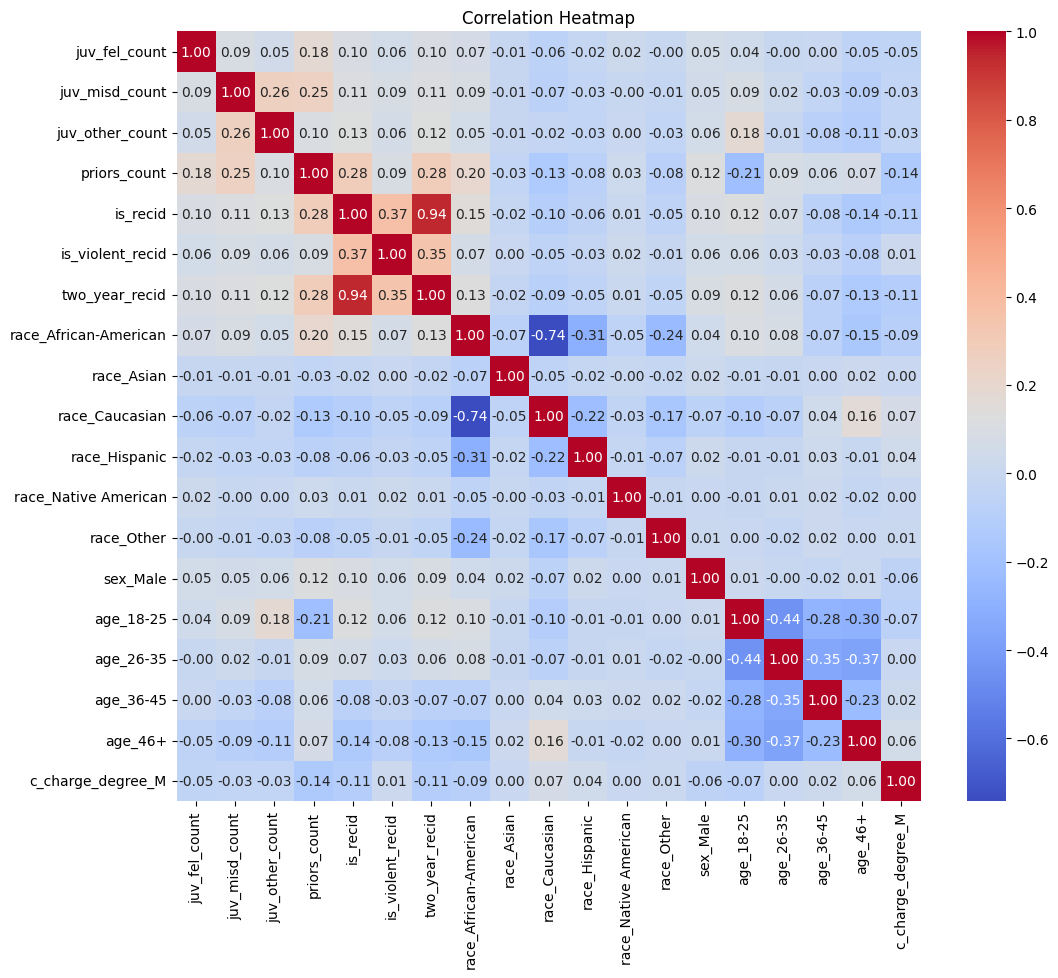

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

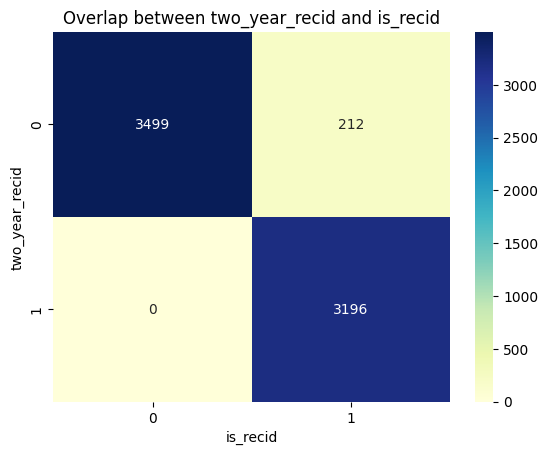

In [48]:
import seaborn as sns

# Create a crosstab to count occurrences
conf_matrix = pd.crosstab(df['two_year_recid'], df['is_recid'],
                          rownames=['two_year_recid'], colnames=['is_recid'])

# Plot the heatmap
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Overlap between two_year_recid and is_recid")
plt.xlabel("is_recid")
plt.ylabel("two_year_recid")
plt.show()

In [49]:
df['is_violent_recid'].value_counts()

,count
is_violent_recid,
0,6104
1,803


# Train Test Split

In [50]:
X = df.drop(columns=['two_year_recid', 'is_recid', 'is_violent_recid'],axis=1)

In [51]:
y = df[['is_recid', 'two_year_recid', 'is_violent_recid']]

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## two_year_recid

In [53]:
y_train_two_year_recid = y_train['two_year_recid']
y_test_two_year_recid = y_test['two_year_recid']
y_train_two_year_recid.shape, y_test_two_year_recid.shape

((5525,), (1382,))

###XGB

In [54]:
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [55]:
model_1 = xgb.XGBClassifier(random_state=42)
model_1.fit(X_train, y_train_two_year_recid)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [56]:
y_pred_1 = model_1.predict(X_test)

Accuracy: 0.6468885672937771
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.76      0.70       737
           1       0.65      0.52      0.58       645

    accuracy                           0.65      1382
   macro avg       0.65      0.64      0.64      1382
weighted avg       0.65      0.65      0.64      1382

Confusion Matrix:
 [[558 179]
 [309 336]]


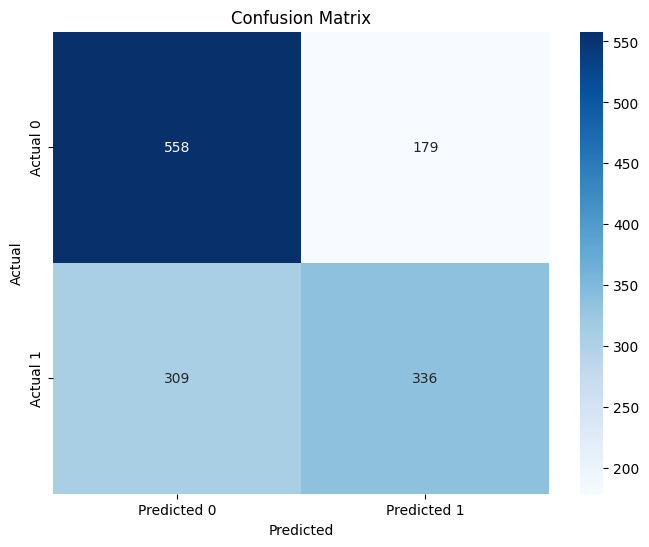

In [57]:
# Calculate accuracy
accuracy_1 = accuracy_score(y_test_two_year_recid, y_pred_1)
print(f"Accuracy: {accuracy_1}")

# Generate classification report
class_report_1 = classification_report(y_test_two_year_recid, y_pred_1)
print("Classification Report:\n", class_report_1)

# Generate confusion matrix
conf_matrix_1 = confusion_matrix(y_test_two_year_recid, y_pred_1)
print("Confusion Matrix:\n", conf_matrix_1)

# You can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_1, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


###SVC

In [58]:
from sklearn.svm import SVC
model_2 = SVC(random_state=42)
model_2.fit(X_train, y_train_two_year_recid)

SVC(random_state=42)

In [59]:
y_pred_2 = model_2.predict(X_test)

Accuracy: 0.6555716353111433
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.78      0.71       737
           1       0.67      0.51      0.58       645

    accuracy                           0.66      1382
   macro avg       0.66      0.65      0.64      1382
weighted avg       0.66      0.66      0.65      1382

Confusion Matrix:
 [[578 159]
 [317 328]]


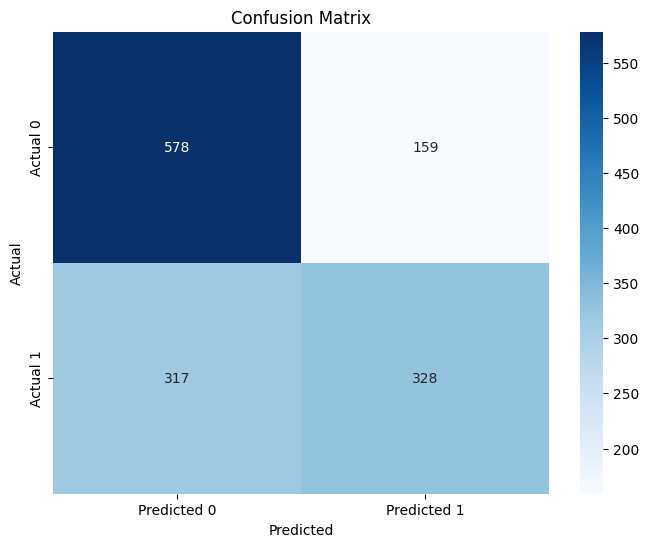

In [60]:
# Calculate accuracy
accuracy_2 = accuracy_score(y_test_two_year_recid, y_pred_2)
print(f"Accuracy: {accuracy_2}")

# Generate classification report
class_report_2 = classification_report(y_test_two_year_recid, y_pred_2)
print("Classification Report:\n", class_report_2)

# Generate confusion matrix
conf_matrix_2 = confusion_matrix(y_test_two_year_recid, y_pred_2)
print("Confusion Matrix:\n", conf_matrix_2)

# You can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_2, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

###Logistic

In [61]:
from sklearn.linear_model import LogisticRegression
model_3 = LogisticRegression(random_state=42)
model_3.fit(X_train, y_train_two_year_recid)

LogisticRegression(random_state=42)

In [62]:
y_pred_3 = model_3.predict(X_test)

Accuracy: 0.6613603473227206
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.76      0.71       737
           1       0.67      0.55      0.60       645

    accuracy                           0.66      1382
   macro avg       0.66      0.65      0.65      1382
weighted avg       0.66      0.66      0.66      1382

Confusion Matrix:
 [[560 177]
 [291 354]]


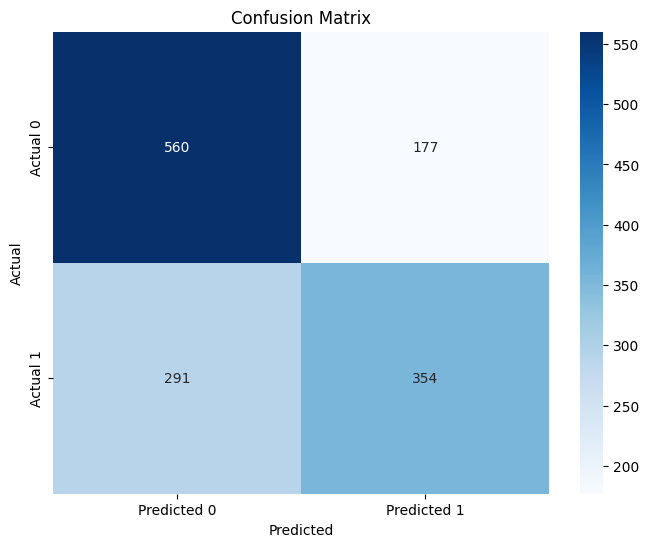

In [63]:
# Calculate accuracy
accuracy_3 = accuracy_score(y_test_two_year_recid, y_pred_3)
print(f"Accuracy: {accuracy_3}")

# Generate classification report
class_report_3 = classification_report(y_test_two_year_recid, y_pred_3)
print("Classification Report:\n", class_report_3)

# Generate confusion matrix
conf_matrix_3 = confusion_matrix(y_test_two_year_recid, y_pred_3)
print("Confusion Matrix:\n", conf_matrix_3)

# You can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_3, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

###GBDT

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

model_4 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
model_4.fit(X_train, y_train_two_year_recid)

GradientBoostingClassifier(max_depth=4, random_state=42)

In [65]:
y_pred_4 = model_4.predict(X_test)

Accuracy: 0.6642547033285094
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.76      0.71       737
           1       0.67      0.56      0.61       645

    accuracy                           0.66      1382
   macro avg       0.66      0.66      0.66      1382
weighted avg       0.66      0.66      0.66      1382

Confusion Matrix:
 [[558 179]
 [285 360]]


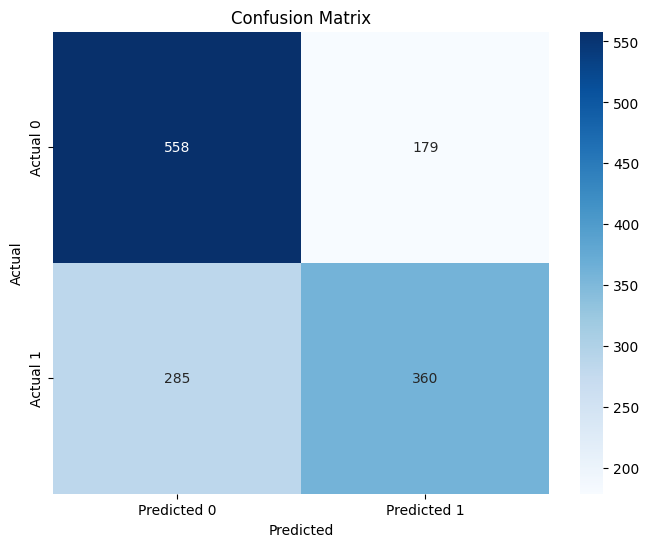

In [66]:
# Calculate accuracy
accuracy_4 = accuracy_score(y_test_two_year_recid, y_pred_4)
print(f"Accuracy: {accuracy_4}")

# Generate classification report
class_report_4 = classification_report(y_test_two_year_recid, y_pred_4)
print("Classification Report:\n", class_report_4)

# Generate confusion matrix
conf_matrix_4 = confusion_matrix(y_test_two_year_recid, y_pred_4)
print("Confusion Matrix:\n", conf_matrix_4)

# You can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_4, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## is_recid


In [67]:
y_train_is_recid = y_train['is_recid']
y_test_is_recid = y_test['is_recid']
y_train_is_recid.shape, y_test_is_recid.shape

((5525,), (1382,))

###XGB

In [68]:
model_5 = xgb.XGBClassifier(random_state=42)
model_5.fit(X_train, y_train_is_recid)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [69]:
y_pred_5 = model_5.predict(X_test)

Accuracy: 0.658465991316932
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.74      0.68       688
           1       0.69      0.57      0.63       694

    accuracy                           0.66      1382
   macro avg       0.66      0.66      0.66      1382
weighted avg       0.66      0.66      0.66      1382

Confusion Matrix:
 [[511 177]
 [295 399]]


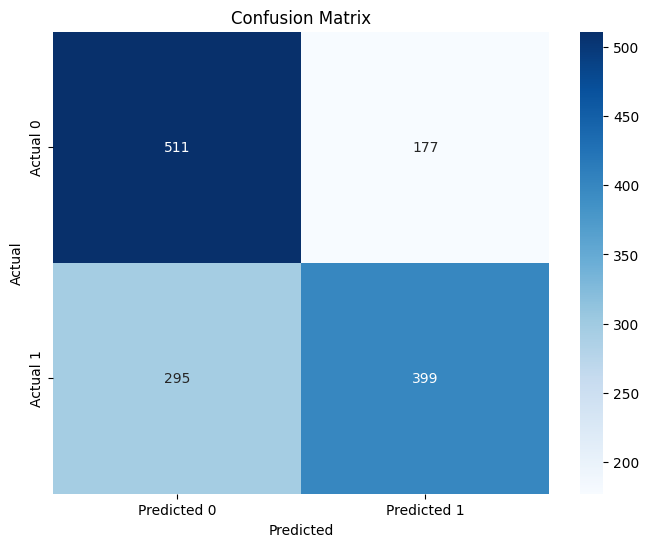

In [70]:
# Calculate accuracy
accuracy_5 = accuracy_score(y_test_is_recid, y_pred_5)
print(f"Accuracy: {accuracy_5}")

# Generate classification report
class_report_5 = classification_report(y_test_is_recid, y_pred_5)
print("Classification Report:\n", class_report_5)

# Generate confusion matrix
conf_matrix_5 = confusion_matrix(y_test_is_recid, y_pred_5)
print("Confusion Matrix:\n", conf_matrix_5)

# You can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_5, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

###SVC

In [71]:
from sklearn.svm import SVC
model_6 = SVC(random_state=42)
model_6.fit(X_train, y_train_is_recid)

SVC(random_state=42)

In [72]:
y_pred_6 = model_6.predict(X_test)

Accuracy: 0.6620839363241678
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.78      0.70       688
           1       0.72      0.54      0.62       694

    accuracy                           0.66      1382
   macro avg       0.67      0.66      0.66      1382
weighted avg       0.67      0.66      0.66      1382

Confusion Matrix:
 [[538 150]
 [317 377]]


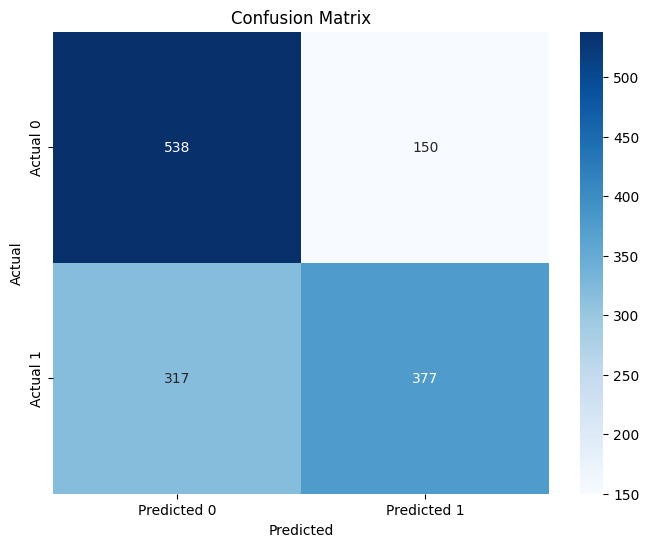

In [73]:
# Calculate accuracy
accuracy_6 = accuracy_score(y_test_is_recid, y_pred_6)
print(f"Accuracy: {accuracy_6}")

# Generate classification report
class_report_6 = classification_report(y_test_is_recid, y_pred_6)
print("Classification Report:\n", class_report_6)

# Generate confusion matrix
conf_matrix_6 = confusion_matrix(y_test_is_recid, y_pred_6)
print("Confusion Matrix:\n", conf_matrix_6)

# You can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_6, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

###Logistic

In [74]:
from sklearn.linear_model import LogisticRegression
model_7 = LogisticRegression(random_state=42)
model_7.fit(X_train, y_train_is_recid)

LogisticRegression(random_state=42)

In [75]:
y_pred_7 = model_7.predict(X_test)

Accuracy: 0.6751085383502171
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.72      0.69       688
           1       0.70      0.63      0.66       694

    accuracy                           0.68      1382
   macro avg       0.68      0.68      0.67      1382
weighted avg       0.68      0.68      0.67      1382

Confusion Matrix:
 [[497 191]
 [258 436]]


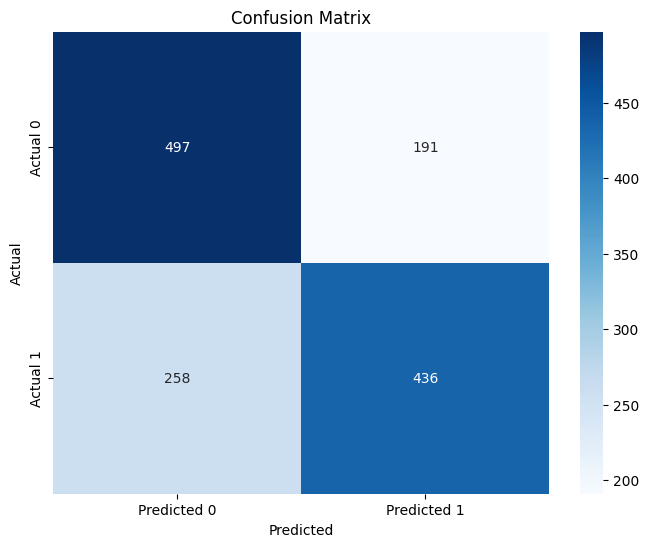

In [76]:
# Calculate accuracy
accuracy_7 = accuracy_score(y_test_is_recid, y_pred_7)
print(f"Accuracy: {accuracy_7}")

# Generate classification report
class_report_7 = classification_report(y_test_is_recid, y_pred_7)
print("Classification Report:\n", class_report_7)

# Generate confusion matrix
conf_matrix_7 = confusion_matrix(y_test_is_recid, y_pred_7)
print("Confusion Matrix:\n", conf_matrix_7)

# You can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_7, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

###GBDT

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

model_8 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
model_8.fit(X_train, y_train_is_recid)

GradientBoostingClassifier(max_depth=4, random_state=42)

In [78]:
y_pred_8 = model_8.predict(X_test)

Accuracy: 0.6577424023154848
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.71      0.69       737
           1       0.64      0.60      0.62       645

    accuracy                           0.66      1382
   macro avg       0.66      0.65      0.65      1382
weighted avg       0.66      0.66      0.66      1382

Confusion Matrix:
 [[525 212]
 [261 384]]


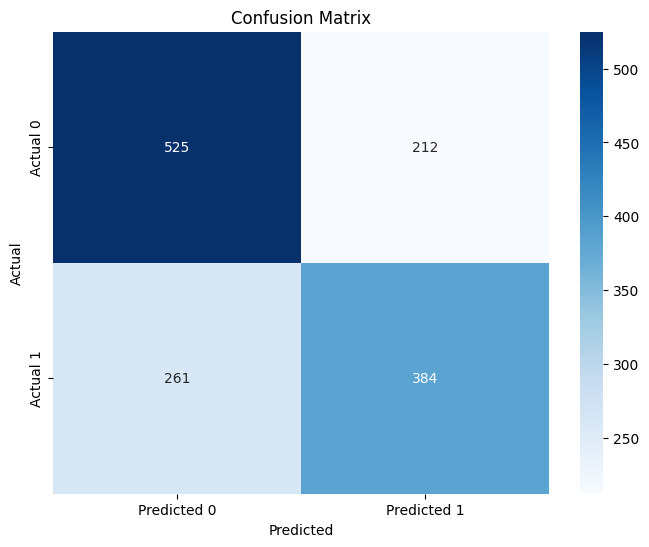

In [79]:
# Calculate accuracy
accuracy_8 = accuracy_score(y_test_two_year_recid, y_pred_8)
print(f"Accuracy: {accuracy_8}")

# Generate classification report
class_report_8 = classification_report(y_test_two_year_recid, y_pred_8)
print("Classification Report:\n", class_report_8)

# Generate confusion matrix
conf_matrix_8 = confusion_matrix(y_test_two_year_recid, y_pred_8)
print("Confusion Matrix:\n", conf_matrix_8)

# You can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_8, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SHAP

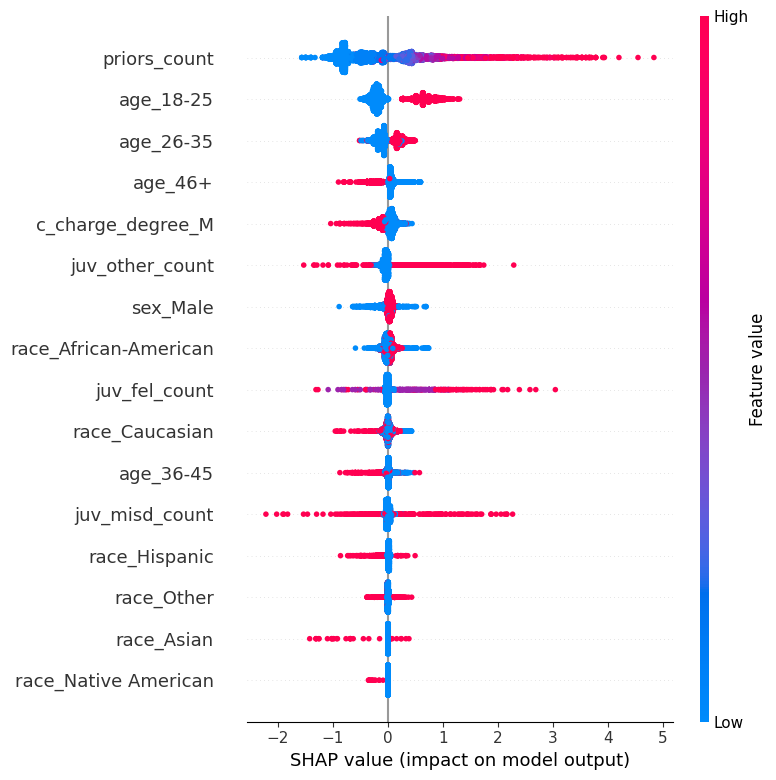

In [80]:
# Two year XGB
import shap
explainer = shap.Explainer(model_1)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

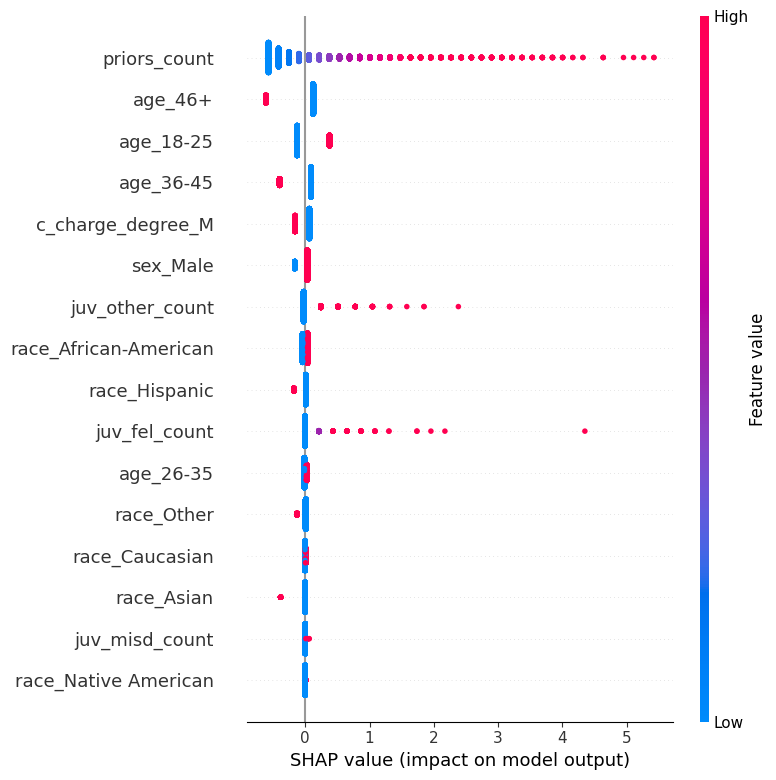

In [81]:
# Two year recid Logistic
import shap

explainer = shap.LinearExplainer(model_3, X_train)  # Use LinearExplainer for Logistic Regression
shap_values = explainer.shap_values(X)

# SHAP summary plot
shap.summary_plot(shap_values, X)

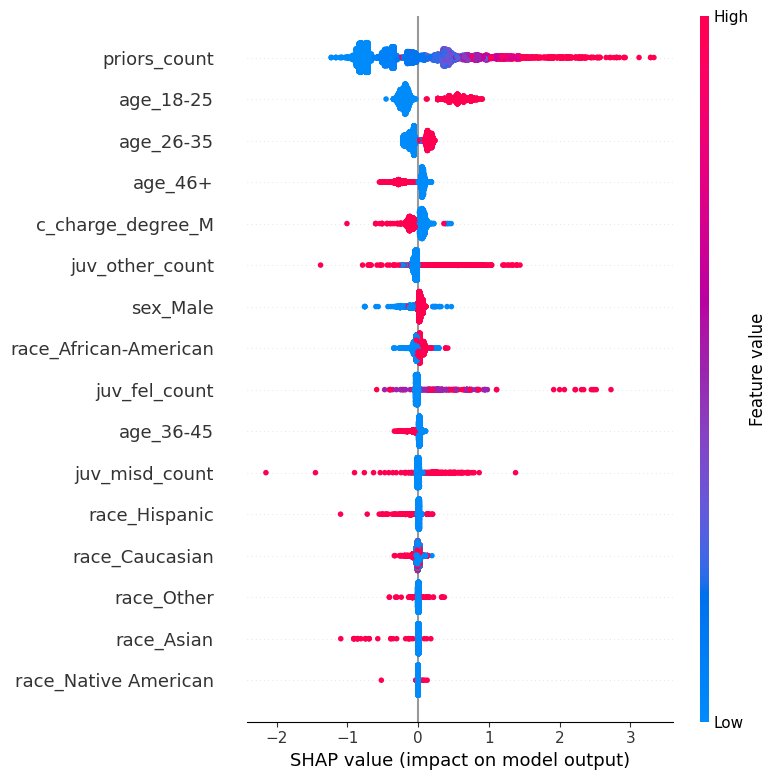

In [82]:
# Two year GBDT
import shap
explainer = shap.Explainer(model_4)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

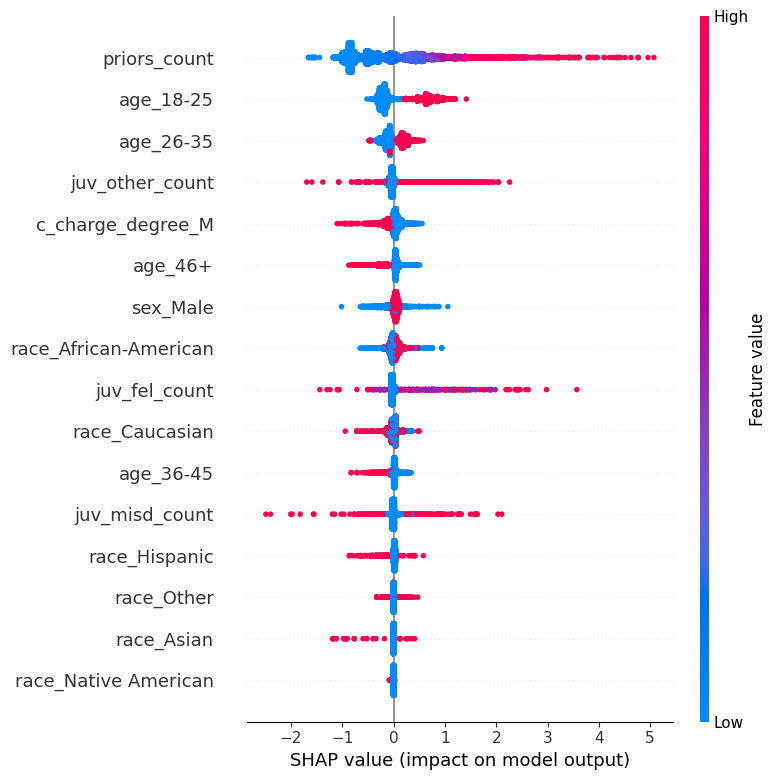

In [83]:
# Is recid XGB
import shap
explainer = shap.Explainer(model_5)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

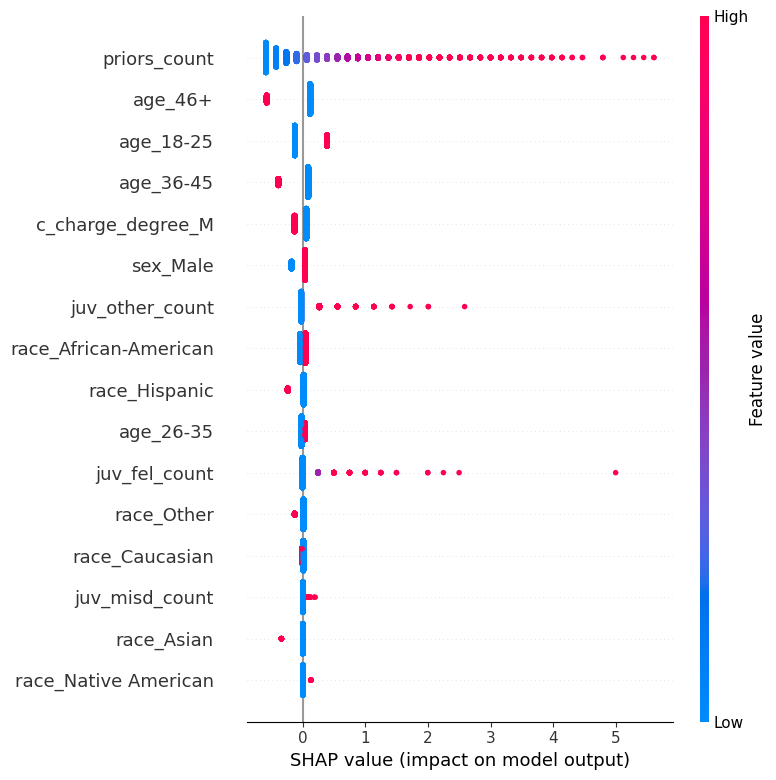

In [84]:
# Is recid Logistic
import shap

explainer = shap.LinearExplainer(model_7, X_train)  # Use LinearExplainer for Logistic Regression
shap_values = explainer.shap_values(X)

# SHAP summary plot
shap.summary_plot(shap_values, X)

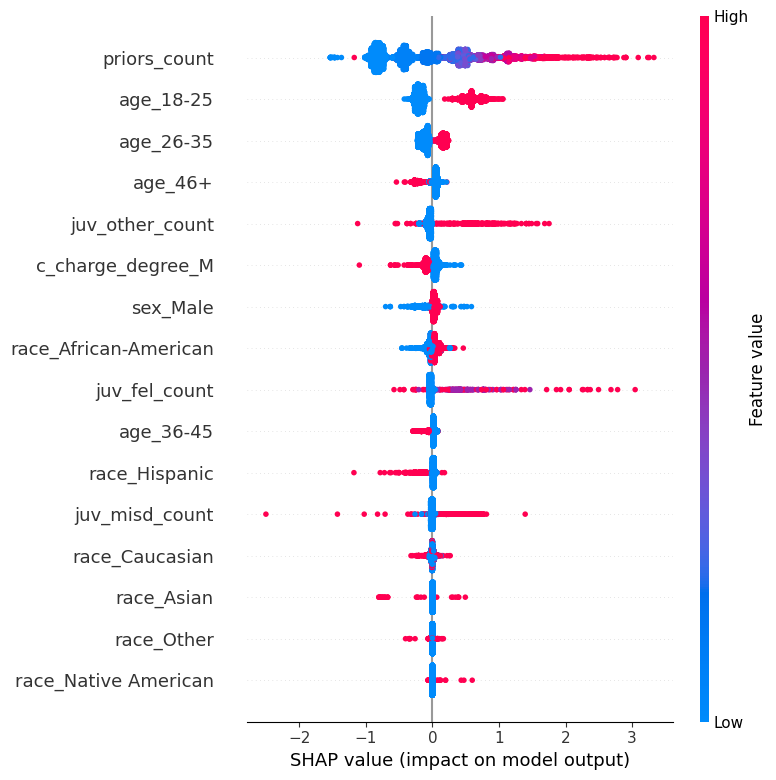

In [85]:
# Is recid GBDT
import shap
explainer = shap.Explainer(model_8)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

In [86]:
# import shap
# import numpy as np

# # Select a small subset of training data as background
# background = X_train.sample(50, random_state=42)

# # Initialize KernelExplainer
# explainer = shap.KernelExplainer(model_2.predict, background)

# # Compute SHAP values
# shap_values = explainer.shap_values(X_test)

# # Visualize summary plot
# shap.summary_plot(shap_values, X_test)

# Fairlearn

## two_year_recid

### Sex

In [106]:
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score

# Define sensitive attribute
sensitive_attr = X_test['sex_Male']

# Dictionary mapping models to predictions
model_predictions = {
    "XGB": y_pred_1,
    "SVC": y_pred_2,
    "Logistic Regression": y_pred_3,
    "GBDT": y_pred_4
}

# Compute fairness metrics for each model
for model_name, y_pred in model_predictions.items():
    metrics = MetricFrame(metrics=accuracy_score, y_true=y_test_two_year_recid, y_pred=y_pred, sensitive_features=sensitive_attr)
    print(f"{model_name} Overall Accuracy: {metrics.overall}")
    print(f"{model_name} Accuracy by Group:\n{metrics.by_group}\n")


XGB Overall Accuracy: 0.6468885672937771
XGB Accuracy by Group:
sex_Male
0    0.693727
1    0.635464
Name: accuracy_score, dtype: float64

SVC Overall Accuracy: 0.6555716353111433
SVC Accuracy by Group:
sex_Male
0    0.719557
1    0.639964
Name: accuracy_score, dtype: float64

Logistic Regression Overall Accuracy: 0.6613603473227206
Logistic Regression Accuracy by Group:
sex_Male
0    0.701107
1    0.651665
Name: accuracy_score, dtype: float64

GBDT Overall Accuracy: 0.6642547033285094
GBDT Accuracy by Group:
sex_Male
0    0.715867
1    0.651665
Name: accuracy_score, dtype: float64



### Race

In [107]:
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score

# Define sensitive attribute
sensitive_attr = X_test['race_Caucasian']

# Dictionary mapping models to predictions
model_predictions = {
    "XGB": y_pred_1,
    "SVC": y_pred_2,
    "Logistic Regression": y_pred_3,
    "GBDT": y_pred_4
}

# Compute fairness metrics for each model
for model_name, y_pred in model_predictions.items():
    metrics = MetricFrame(metrics=accuracy_score, y_true=y_test_two_year_recid, y_pred=y_pred, sensitive_features=sensitive_attr)
    print(f"{model_name} Overall Accuracy: {metrics.overall}")
    print(f"{model_name} Accuracy by Group:\n{metrics.by_group}\n")


XGB Overall Accuracy: 0.6468885672937771
XGB Accuracy by Group:
race_Caucasian
0    0.652884
1    0.634989
Name: accuracy_score, dtype: float64

SVC Overall Accuracy: 0.6555716353111433
SVC Accuracy by Group:
race_Caucasian
0    0.658324
1    0.650108
Name: accuracy_score, dtype: float64

Logistic Regression Overall Accuracy: 0.6613603473227206
Logistic Regression Accuracy by Group:
race_Caucasian
0    0.669206
1    0.645788
Name: accuracy_score, dtype: float64

GBDT Overall Accuracy: 0.6642547033285094
GBDT Accuracy by Group:
race_Caucasian
0    0.673558
1    0.645788
Name: accuracy_score, dtype: float64



## is_recid

### Sex

In [108]:
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score

# Define sensitive attribute
sensitive_attr = X_test['sex_Male']

# Dictionary mapping models to predictions
model_predictions = {
    "XGB": y_pred_5,
    "SVC": y_pred_6,
    "Logistic Regression": y_pred_7,
    "GBDT": y_pred_8
}

# Compute fairness metrics for each model
for model_name, y_pred in model_predictions.items():
    metrics = MetricFrame(metrics=accuracy_score, y_true=y_test_two_year_recid, y_pred=y_pred, sensitive_features=sensitive_attr)
    print(f"{model_name} Overall Accuracy: {metrics.overall}")
    print(f"{model_name} Accuracy by Group:\n{metrics.by_group}\n")


XGB Overall Accuracy: 0.650506512301013
XGB Accuracy by Group:
sex_Male
0    0.701107
1    0.638164
Name: accuracy_score, dtype: float64

SVC Overall Accuracy: 0.6555716353111433
SVC Accuracy by Group:
sex_Male
0    0.697417
1    0.645365
Name: accuracy_score, dtype: float64

Logistic Regression Overall Accuracy: 0.6613603473227206
Logistic Regression Accuracy by Group:
sex_Male
0    0.690037
1    0.654365
Name: accuracy_score, dtype: float64

GBDT Overall Accuracy: 0.6577424023154848
GBDT Accuracy by Group:
sex_Male
0    0.701107
1    0.647165
Name: accuracy_score, dtype: float64



### Race

In [109]:
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score

# Define sensitive attribute
sensitive_attr = X_test['race_Caucasian']

# Dictionary mapping models to predictions
model_predictions = {
    "XGB": y_pred_5,
    "SVC": y_pred_6,
    "Logistic Regression": y_pred_7,
    "GBDT": y_pred_8
}

# Compute fairness metrics for each model
for model_name, y_pred in model_predictions.items():
    metrics = MetricFrame(metrics=accuracy_score, y_true=y_test_two_year_recid, y_pred=y_pred, sensitive_features=sensitive_attr)
    print(f"{model_name} Overall Accuracy: {metrics.overall}")
    print(f"{model_name} Accuracy by Group:\n{metrics.by_group}\n")


XGB Overall Accuracy: 0.650506512301013
XGB Accuracy by Group:
race_Caucasian
0    0.655060
1    0.641469
Name: accuracy_score, dtype: float64

SVC Overall Accuracy: 0.6555716353111433
SVC Accuracy by Group:
race_Caucasian
0    0.660501
1    0.645788
Name: accuracy_score, dtype: float64

Logistic Regression Overall Accuracy: 0.6613603473227206
Logistic Regression Accuracy by Group:
race_Caucasian
0    0.667029
1    0.650108
Name: accuracy_score, dtype: float64

GBDT Overall Accuracy: 0.6577424023154848
GBDT Accuracy by Group:
race_Caucasian
0    0.671382
1    0.630670
Name: accuracy_score, dtype: float64



# LIME (Not useful)

In [ ]:
import lime
import lime.lime_tabular

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X.values,
    feature_names=X.columns.tolist(),
    class_names=['No', 'Yes'],
    mode='classification'
)

# Explain an instance (e.g., first row)
exp = explainer.explain_instance(X.iloc[0].values, model_1.predict_proba)
exp.show_in_notebook()

# In processing and post processing

In [113]:
!pip install aif360

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 15.0 MB/s eta 0:00:00


## Only for sex


### XGB

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# import xgboost as xgb
# from sklearn.metrics import accuracy_score
# from aif360.metrics import ClassificationMetric
# from aif360.algorithms.postprocessing import RejectOptionClassification, CalibratedEqOddsPostprocessing, EqOddsPostprocessing
# from aif360.algorithms.inprocessing import AdversarialDebiasing
# import tensorflow as tf
# from aif360.datasets import BinaryLabelDataset
# from fairlearn.metrics import MetricFrame

# tf.compat.v1.disable_eager_execution()

# def print_metrics(name, dataset_true, dataset_pred):
#     metric = ClassificationMetric(dataset_true, dataset_pred, privileged_groups, unprivileged_groups)
#     accuracy = accuracy_score(dataset_true.labels, dataset_pred.labels)
#     print(f"{name} Disparate Impact: {metric.disparate_impact()}")
#     print(f"{name} Accuracy: {accuracy}\n")

#     # Fairlearn Accuracy by Group
#     y_true = dataset_true.labels.flatten()
#     y_pred = dataset_pred.labels.flatten()
#     fair_metrics = MetricFrame(metrics=accuracy_score, y_true=y_true, y_pred=y_pred, sensitive_features=X_test['sex_Male'])
#     print(f"{name} Fairlearn Overall Accuracy: {fair_metrics.overall}")
#     print(f"{name} Fairlearn Accuracy by Group:\n{fair_metrics.by_group}\n")

# # Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y['is_recid'], test_size=0.2, random_state=42)

# # Prepare the datasets for aif360
# df_train = X_train.copy()
# df_train['label'] = y_train
# dataset_train = BinaryLabelDataset(df=pd.DataFrame(df_train), label_names=['label'], protected_attribute_names=['sex_Male'])

# df_test = X_test.copy()
# df_test['label'] = y_test
# dataset_test = BinaryLabelDataset(df=pd.DataFrame(df_test), label_names=['label'], protected_attribute_names=['sex_Male'])

# # Define privileged and unprivileged groups
# privileged_groups = [{'sex_Male': 1}]  # Males are privileged
# unprivileged_groups = [{'sex_Male': 0}]  # Females are unprivileged

# # Initial Model
# clf = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

# df_pred = X_test.copy()
# df_pred['label'] = y_pred
# dataset_pred = BinaryLabelDataset(df=pd.DataFrame(df_pred), label_names=['label'], protected_attribute_names=['sex_Male'])

# # Print Initial Model Metrics (Before Debiasing)
# print_metrics("Initial Model", dataset_test, dataset_pred)

# # Adversarial Debiasing
# tf.compat.v1.reset_default_graph()
# sess = tf.compat.v1.Session()
# adv_debiasing = AdversarialDebiasing(
#     privileged_groups=privileged_groups,
#     unprivileged_groups=unprivileged_groups,
#     scope_name='adv_debiasing',
#     debias=True,
#     sess=sess
# )
# adv_debiasing.fit(dataset_train)
# dataset_adv_pred = adv_debiasing.predict(dataset_test)

# # Print Adversarial Debiasing Metrics
# print_metrics("Adversarial Debiasing", dataset_test, dataset_adv_pred)

# # Post-Processing Techniques (ROC, CEO, EO)
# roc = RejectOptionClassification(
#     unprivileged_groups=unprivileged_groups,
#     privileged_groups=privileged_groups,
#     low_class_thresh=0.3,
#     high_class_thresh=0.7,
#     num_class_thresh=100
# )
# roc.fit(dataset_test, dataset_adv_pred)
# dataset_transf_adv_pred = roc.predict(dataset_adv_pred)
# print_metrics("Adversarial Debiasing + ROC", dataset_test, dataset_transf_adv_pred)

# ceo = CalibratedEqOddsPostprocessing(unprivileged_groups, privileged_groups, seed=42)
# ceo.fit(dataset_test, dataset_adv_pred)
# dataset_ceo_adv_pred = ceo.predict(dataset_adv_pred)
# print_metrics("Adversarial Debiasing + CEO", dataset_test, dataset_ceo_adv_pred)

# eqo = EqOddsPostprocessing(unprivileged_groups, privileged_groups)
# eqo.fit(dataset_test, dataset_adv_pred)
# dataset_eqo_adv_pred = eqo.predict(dataset_adv_pred)
# print_metrics("Adversarial Debiasing + EO", dataset_test, dataset_eqo_adv_pred)

# # Close the TensorFlow session
# sess.close()


In [116]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from aif360.metrics import ClassificationMetric
from aif360.algorithms.postprocessing import RejectOptionClassification, CalibratedEqOddsPostprocessing, EqOddsPostprocessing
from aif360.algorithms.inprocessing import AdversarialDebiasing
import tensorflow as tf
from aif360.datasets import BinaryLabelDataset
tf.compat.v1.disable_eager_execution()

def print_metrics(name, dataset_true, dataset_pred):
    metric = ClassificationMetric(dataset_true, dataset_pred, privileged_groups, unprivileged_groups)
    accuracy = accuracy_score(dataset_true.labels, dataset_pred.labels)
    print(f"{name} Disparate Impact: {metric.disparate_impact()}")
    print(f"{name} Accuracy: {accuracy}\n")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y['is_recid'], test_size=0.2, random_state=42)

# Prepare the datasets for aif360

df_train = X_train.copy()
df_train['label'] = y_train
dataset_train = BinaryLabelDataset(df=pd.DataFrame(df_train), label_names=['label'], protected_attribute_names=['sex_Male'])

df_test = X_test.copy()
df_test['label'] = y_test
dataset_test = BinaryLabelDataset(df=pd.DataFrame(df_test), label_names=['label'], protected_attribute_names=['sex_Male'])

# Define privileged and unprivileged groups
privileged_groups = [{'sex_Male': 1}]  # Males are privileged
unprivileged_groups = [{'sex_Male': 0}]  # Females are unprivileged

# Initial Model
clf = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

df_pred = X_test.copy()
df_pred['label'] = y_pred
dataset_pred = BinaryLabelDataset(df=pd.DataFrame(df_pred), label_names=['label'], protected_attribute_names=['sex_Male'])

# Print Initial Model Metrics
print_metrics("Initial Model", dataset_test, dataset_pred)

# Adversarial Debiasing

tf.compat.v1.reset_default_graph()  # Reset graph to avoid variable duplication
sess = tf.compat.v1.Session()
adv_debiasing = AdversarialDebiasing(
    privileged_groups=privileged_groups,
    unprivileged_groups=unprivileged_groups,
    scope_name='adv_debiasing',
    debias=True,
    sess=sess
)
adv_debiasing.fit(dataset_train)
dataset_adv_pred = adv_debiasing.predict(dataset_test)

# Print Adversarial Debiasing Metrics
print_metrics("Adversarial Debiasing", dataset_test, dataset_adv_pred)

# Post-Processing Techniques (ROC, CEO, EO)
roc = RejectOptionClassification(
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups,
    low_class_thresh=0.3,
    high_class_thresh=0.7,
    num_class_thresh=100
)
roc.fit(dataset_test, dataset_pred)
dataset_transf_pred = roc.predict(dataset_pred)

ceo = CalibratedEqOddsPostprocessing(unprivileged_groups, privileged_groups, seed=42)
ceo.fit(dataset_test, dataset_pred)
dataset_ceo_pred = ceo.predict(dataset_pred)

eqo = EqOddsPostprocessing(unprivileged_groups, privileged_groups)
eqo.fit(dataset_test, dataset_pred)
dataset_eqo_pred = eqo.predict(dataset_pred)


# Print Post-Processing Metrics for Initial Model
print_metrics("Post-Processed ROC (Initial Model)", dataset_test, dataset_transf_pred)
print_metrics("Post-Processed CEO (Initial Model)", dataset_test, dataset_ceo_pred)
print_metrics("Post-Processed EO (Initial Model)", dataset_test, dataset_eqo_pred)


# Apply Post-Processing to Adversarial Debiasing Model Predictions
roc.fit(dataset_test, dataset_adv_pred)
dataset_transf_adv_pred = roc.predict(dataset_adv_pred)

ceo.fit(dataset_test, dataset_adv_pred)
dataset_ceo_adv_pred = ceo.predict(dataset_adv_pred)

eqo.fit(dataset_test, dataset_adv_pred)
dataset_eqo_adv_pred = eqo.predict(dataset_adv_pred)


# Print Post-Processing Metrics for Adversarial Debiasing Model
print_metrics("Post-Processed ROC (Adversarial Debiasing)", dataset_test, dataset_transf_adv_pred)
print_metrics("Post-Processed CEO (Adversarial Debiasing)", dataset_test, dataset_ceo_adv_pred)
print_metrics("Post-Processed EO (Adversarial Debiasing)", dataset_test, dataset_eqo_adv_pred)


# Close the TensorFlow session
sess.close()

Initial Model Disparate Impact: 1.6547303378986546
Initial Model Accuracy: 0.658465991316932

epoch 0; iter: 0; batch classifier loss: 0.763088; batch adversarial loss: 0.822992
epoch 1; iter: 0; batch classifier loss: 0.747034; batch adversarial loss: 0.957758
epoch 2; iter: 0; batch classifier loss: 0.708452; batch adversarial loss: 0.996568
epoch 3; iter: 0; batch classifier loss: 0.670905; batch adversarial loss: 0.856969
epoch 4; iter: 0; batch classifier loss: 0.577390; batch adversarial loss: 0.897651
epoch 5; iter: 0; batch classifier loss: 0.625455; batch adversarial loss: 0.782923
epoch 6; iter: 0; batch classifier loss: 0.626246; batch adversarial loss: 0.784046
epoch 7; iter: 0; batch classifier loss: 0.616621; batch adversarial loss: 0.745946
epoch 8; iter: 0; batch classifier loss: 0.577382; batch adversarial loss: 0.738055
epoch 9; iter: 0; batch classifier loss: 0.613828; batch adversarial loss: 0.658522
epoch 10; iter: 0; batch classifier loss: 0.595963; batch adversar

/usr/local/lib/python3.11/dist-packages/aif360/algorithms/postprocessing/reject_option_classification.py:160: UserWarning: Unable to satisy fairness constraints
  warn("Unable to satisy fairness constraints")


Post-Processed ROC (Initial Model) Disparate Impact: 1.6547303378986546
Post-Processed ROC (Initial Model) Accuracy: 0.658465991316932

Post-Processed CEO (Initial Model) Disparate Impact: 2.605320106478733
Post-Processed CEO (Initial Model) Accuracy: 0.6577424023154848

Post-Processed EO (Initial Model) Disparate Impact: 1.1752720726618118
Post-Processed EO (Initial Model) Accuracy: 0.6295224312590448

Post-Processed ROC (Adversarial Debiasing) Disparate Impact: 0.5957799319754984
Post-Processed ROC (Adversarial Debiasing) Accuracy: 0.6143270622286541

Post-Processed CEO (Adversarial Debiasing) Disparate Impact: 1.1152263374485598
Post-Processed CEO (Adversarial Debiasing) Accuracy: 0.5137481910274964

Post-Processed EO (Adversarial Debiasing) Disparate Impact: 1.012838320869124
Post-Processed EO (Adversarial Debiasing) Accuracy: 0.5296671490593343



/usr/local/lib/python3.11/dist-packages/aif360/algorithms/postprocessing/reject_option_classification.py:160: UserWarning: Unable to satisy fairness constraints
  warn("Unable to satisy fairness constraints")


### SVC

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from aif360.metrics import ClassificationMetric
from aif360.algorithms.postprocessing import RejectOptionClassification, CalibratedEqOddsPostprocessing, EqOddsPostprocessing
from aif360.algorithms.inprocessing import AdversarialDebiasing
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

def print_metrics(name, dataset_true, dataset_pred):
    metric = ClassificationMetric(dataset_true, dataset_pred, privileged_groups, unprivileged_groups)
    accuracy = accuracy_score(dataset_true.labels, dataset_pred.labels)
    print(f"{name} Disparate Impact: {metric.disparate_impact()}")
    print(f"{name} Accuracy: {accuracy}\n")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y['is_recid'], test_size=0.2, random_state=42)

# Prepare the datasets for aif360

df_train = X_train.copy()
df_train['label'] = y_train
dataset_train = BinaryLabelDataset(df=pd.DataFrame(df_train), label_names=['label'], protected_attribute_names=['sex_Male'])

df_test = X_test.copy()
df_test['label'] = y_test
dataset_test = BinaryLabelDataset(df=pd.DataFrame(df_test), label_names=['label'], protected_attribute_names=['sex_Male'])

# Define privileged and unprivileged groups
privileged_groups = [{'sex_Male': 1}]  # Males are privileged
unprivileged_groups = [{'sex_Male': 0}]  # Females are unprivileged

# Initial Model
clf = SVC(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

df_pred = X_test.copy()
df_pred['label'] = y_pred
dataset_pred = BinaryLabelDataset(df=pd.DataFrame(df_pred), label_names=['label'], protected_attribute_names=['sex_Male'])

# Print Initial Model Metrics
print_metrics("Initial Model", dataset_test, dataset_pred)

# Adversarial Debiasing

tf.compat.v1.reset_default_graph()  # Reset graph to avoid variable duplication
sess = tf.compat.v1.Session()
adv_debiasing = AdversarialDebiasing(
    privileged_groups=privileged_groups,
    unprivileged_groups=unprivileged_groups,
    scope_name='adv_debiasing',
    debias=True,
    sess=sess
)
adv_debiasing.fit(dataset_train)
dataset_adv_pred = adv_debiasing.predict(dataset_test)

# Print Adversarial Debiasing Metrics
print_metrics("Adversarial Debiasing", dataset_test, dataset_adv_pred)

# Post-Processing Techniques (ROC, CEO, EO)
roc = RejectOptionClassification(
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups,
    low_class_thresh=0.3,
    high_class_thresh=0.7,
    num_class_thresh=100
)
roc.fit(dataset_test, dataset_pred)
dataset_transf_pred = roc.predict(dataset_pred)

ceo = CalibratedEqOddsPostprocessing(unprivileged_groups, privileged_groups, seed=42)
ceo.fit(dataset_test, dataset_pred)
dataset_ceo_pred = ceo.predict(dataset_pred)

eqo = EqOddsPostprocessing(unprivileged_groups, privileged_groups)
eqo.fit(dataset_test, dataset_pred)
dataset_eqo_pred = eqo.predict(dataset_pred)


# Print Post-Processing Metrics for Initial Model
print_metrics("Post-Processed ROC (Initial Model)", dataset_test, dataset_transf_pred)
print_metrics("Post-Processed CEO (Initial Model)", dataset_test, dataset_ceo_pred)
print_metrics("Post-Processed EO (Initial Model)", dataset_test, dataset_eqo_pred)


# Apply Post-Processing to Adversarial Debiasing Model Predictions
roc.fit(dataset_test, dataset_adv_pred)
dataset_transf_adv_pred = roc.predict(dataset_adv_pred)

ceo.fit(dataset_test, dataset_adv_pred)
dataset_ceo_adv_pred = ceo.predict(dataset_adv_pred)

eqo.fit(dataset_test, dataset_adv_pred)
dataset_eqo_adv_pred = eqo.predict(dataset_adv_pred)


# Print Post-Processing Metrics for Adversarial Debiasing Model
print_metrics("Post-Processed ROC (Adversarial Debiasing)", dataset_test, dataset_transf_adv_pred)
print_metrics("Post-Processed CEO (Adversarial Debiasing)", dataset_test, dataset_ceo_adv_pred)
print_metrics("Post-Processed EO (Adversarial Debiasing)", dataset_test, dataset_eqo_adv_pred)


# Close the TensorFlow session
sess.close()

Initial Model Disparate Impact: 1.7965225093937967
Initial Model Accuracy: 0.6620839363241678

epoch 0; iter: 0; batch classifier loss: 0.709384; batch adversarial loss: 0.688910
epoch 1; iter: 0; batch classifier loss: 0.656313; batch adversarial loss: 0.667003
epoch 2; iter: 0; batch classifier loss: 0.723551; batch adversarial loss: 0.654078
epoch 3; iter: 0; batch classifier loss: 0.632741; batch adversarial loss: 0.632368
epoch 4; iter: 0; batch classifier loss: 0.691563; batch adversarial loss: 0.629661
epoch 5; iter: 0; batch classifier loss: 0.728617; batch adversarial loss: 0.634655
epoch 6; iter: 0; batch classifier loss: 0.774460; batch adversarial loss: 0.631168
epoch 7; iter: 0; batch classifier loss: 0.817081; batch adversarial loss: 0.630543
epoch 8; iter: 0; batch classifier loss: 0.761604; batch adversarial loss: 0.650136
epoch 9; iter: 0; batch classifier loss: 0.653246; batch adversarial loss: 0.581132
epoch 10; iter: 0; batch classifier loss: 0.673833; batch adversa

/usr/local/lib/python3.11/dist-packages/aif360/algorithms/postprocessing/reject_option_classification.py:160: UserWarning: Unable to satisy fairness constraints
  warn("Unable to satisy fairness constraints")


Post-Processed ROC (Initial Model) Disparate Impact: 1.7965225093937967
Post-Processed ROC (Initial Model) Accuracy: 0.6620839363241678

Post-Processed CEO (Initial Model) Disparate Impact: 2.978445212942347
Post-Processed CEO (Initial Model) Accuracy: 0.6642547033285094

Post-Processed EO (Initial Model) Disparate Impact: 1.2196219621962194
Post-Processed EO (Initial Model) Accuracy: 0.6280752532561505

Post-Processed ROC (Adversarial Debiasing) Disparate Impact: 0.9532505397779043
Post-Processed ROC (Adversarial Debiasing) Accuracy: 0.6454413892908828

Post-Processed CEO (Adversarial Debiasing) Disparate Impact: 1.0366786678667868
Post-Processed CEO (Adversarial Debiasing) Accuracy: 0.622286541244573

Post-Processed EO (Adversarial Debiasing) Disparate Impact: 1.0912407030176703
Post-Processed EO (Adversarial Debiasing) Accuracy: 0.613603473227207



### Logistic Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from aif360.metrics import ClassificationMetric
from aif360.algorithms.postprocessing import RejectOptionClassification, CalibratedEqOddsPostprocessing, EqOddsPostprocessing
from aif360.algorithms.inprocessing import AdversarialDebiasing
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

def print_metrics(name, dataset_true, dataset_pred):
    metric = ClassificationMetric(dataset_true, dataset_pred, privileged_groups, unprivileged_groups)
    accuracy = accuracy_score(dataset_true.labels, dataset_pred.labels)
    print(f"{name} Disparate Impact: {metric.disparate_impact()}")
    print(f"{name} Accuracy: {accuracy}\n")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y['is_recid'], test_size=0.2, random_state=42)

# Prepare the datasets for aif360

df_train = X_train.copy()
df_train['label'] = y_train
dataset_train = BinaryLabelDataset(df=pd.DataFrame(df_train), label_names=['label'], protected_attribute_names=['sex_Male'])

df_test = X_test.copy()
df_test['label'] = y_test
dataset_test = BinaryLabelDataset(df=pd.DataFrame(df_test), label_names=['label'], protected_attribute_names=['sex_Male'])

# Define privileged and unprivileged groups
privileged_groups = [{'sex_Male': 1}]  # Males are privileged
unprivileged_groups = [{'sex_Male': 0}]  # Females are unprivileged

# Initial Model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

df_pred = X_test.copy()
df_pred['label'] = y_pred
dataset_pred = BinaryLabelDataset(df=pd.DataFrame(df_pred), label_names=['label'], protected_attribute_names=['sex_Male'])

# Print Initial Model Metrics
print_metrics("Initial Model", dataset_test, dataset_pred)

# Adversarial Debiasing

tf.compat.v1.reset_default_graph()  # Reset graph to avoid variable duplication
sess = tf.compat.v1.Session()
adv_debiasing = AdversarialDebiasing(
    privileged_groups=privileged_groups,
    unprivileged_groups=unprivileged_groups,
    scope_name='adv_debiasing',
    debias=True,
    sess=sess
)
adv_debiasing.fit(dataset_train)
dataset_adv_pred = adv_debiasing.predict(dataset_test)

# Print Adversarial Debiasing Metrics
print_metrics("Adversarial Debiasing", dataset_test, dataset_adv_pred)

# Post-Processing Techniques (ROC, CEO, EO)
roc = RejectOptionClassification(
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups,
    low_class_thresh=0.3,
    high_class_thresh=0.7,
    num_class_thresh=100
)
roc.fit(dataset_test, dataset_pred)
dataset_transf_pred = roc.predict(dataset_pred)

ceo = CalibratedEqOddsPostprocessing(unprivileged_groups, privileged_groups, seed=42)
ceo.fit(dataset_test, dataset_pred)
dataset_ceo_pred = ceo.predict(dataset_pred)

eqo = EqOddsPostprocessing(unprivileged_groups, privileged_groups)
eqo.fit(dataset_test, dataset_pred)
dataset_eqo_pred = eqo.predict(dataset_pred)


# Print Post-Processing Metrics for Initial Model
print_metrics("Post-Processed ROC (Initial Model)", dataset_test, dataset_transf_pred)
print_metrics("Post-Processed CEO (Initial Model)", dataset_test, dataset_ceo_pred)
print_metrics("Post-Processed EO (Initial Model)", dataset_test, dataset_eqo_pred)


# Apply Post-Processing to Adversarial Debiasing Model Predictions
roc.fit(dataset_test, dataset_adv_pred)
dataset_transf_adv_pred = roc.predict(dataset_adv_pred)

ceo.fit(dataset_test, dataset_adv_pred)
dataset_ceo_adv_pred = ceo.predict(dataset_adv_pred)

eqo.fit(dataset_test, dataset_adv_pred)
dataset_eqo_adv_pred = eqo.predict(dataset_adv_pred)


# Print Post-Processing Metrics for Adversarial Debiasing Model
print_metrics("Post-Processed ROC (Adversarial Debiasing)", dataset_test, dataset_transf_adv_pred)
print_metrics("Post-Processed CEO (Adversarial Debiasing)", dataset_test, dataset_ceo_adv_pred)
print_metrics("Post-Processed EO (Adversarial Debiasing)", dataset_test, dataset_eqo_adv_pred)


# Close the TensorFlow session
sess.close()

Initial Model Disparate Impact: 2.439243924392439
Initial Model Accuracy: 0.6751085383502171

epoch 0; iter: 0; batch classifier loss: 0.636268; batch adversarial loss: 0.639429
epoch 1; iter: 0; batch classifier loss: 0.602434; batch adversarial loss: 0.606200
epoch 2; iter: 0; batch classifier loss: 0.616404; batch adversarial loss: 0.598858
epoch 3; iter: 0; batch classifier loss: 0.638365; batch adversarial loss: 0.622652
epoch 4; iter: 0; batch classifier loss: 0.707395; batch adversarial loss: 0.641891
epoch 5; iter: 0; batch classifier loss: 0.723474; batch adversarial loss: 0.644150
epoch 6; iter: 0; batch classifier loss: 0.880280; batch adversarial loss: 0.619740
epoch 7; iter: 0; batch classifier loss: 0.930922; batch adversarial loss: 0.662450
epoch 8; iter: 0; batch classifier loss: 0.890861; batch adversarial loss: 0.692224
epoch 9; iter: 0; batch classifier loss: 0.772629; batch adversarial loss: 0.592746
epoch 10; iter: 0; batch classifier loss: 0.822396; batch adversar

/usr/local/lib/python3.11/dist-packages/aif360/algorithms/postprocessing/reject_option_classification.py:160: UserWarning: Unable to satisy fairness constraints
  warn("Unable to satisy fairness constraints")


Post-Processed ROC (Initial Model) Disparate Impact: 2.439243924392439
Post-Processed ROC (Initial Model) Accuracy: 0.6751085383502171

Post-Processed CEO (Initial Model) Disparate Impact: 2.5747574757475746
Post-Processed CEO (Initial Model) Accuracy: 0.6729377713458755

Post-Processed EO (Initial Model) Disparate Impact: 1.1881478470427687
Post-Processed EO (Initial Model) Accuracy: 0.597684515195369

Post-Processed ROC (Adversarial Debiasing) Disparate Impact: 0.9676339534779924
Post-Processed ROC (Adversarial Debiasing) Accuracy: 0.6591895803183792

Post-Processed CEO (Adversarial Debiasing) Disparate Impact: 1.003376933438025
Post-Processed CEO (Adversarial Debiasing) Accuracy: 0.6490593342981187

Post-Processed EO (Adversarial Debiasing) Disparate Impact: 1.1106344677020894
Post-Processed EO (Adversarial Debiasing) Accuracy: 0.6389290882778582



### GBDT

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from aif360.metrics import ClassificationMetric
from aif360.algorithms.postprocessing import RejectOptionClassification, CalibratedEqOddsPostprocessing, EqOddsPostprocessing
from aif360.algorithms.inprocessing import AdversarialDebiasing
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

def print_metrics(name, dataset_true, dataset_pred):
    metric = ClassificationMetric(dataset_true, dataset_pred, privileged_groups, unprivileged_groups)
    accuracy = accuracy_score(dataset_true.labels, dataset_pred.labels)
    print(f"{name} Disparate Impact: {metric.disparate_impact()}")
    print(f"{name} Accuracy: {accuracy}\n")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y['is_recid'], test_size=0.2, random_state=42)

# Prepare the datasets for aif360

df_train = X_train.copy()
df_train['label'] = y_train
dataset_train = BinaryLabelDataset(df=pd.DataFrame(df_train), label_names=['label'], protected_attribute_names=['sex_Male'])

df_test = X_test.copy()
df_test['label'] = y_test
dataset_test = BinaryLabelDataset(df=pd.DataFrame(df_test), label_names=['label'], protected_attribute_names=['sex_Male'])

# Define privileged and unprivileged groups
privileged_groups = [{'sex_Male': 1}]  # Males are privileged
unprivileged_groups = [{'sex_Male': 0}]  # Females are unprivileged

# Initial Model
clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

df_pred = X_test.copy()
df_pred['label'] = y_pred
dataset_pred = BinaryLabelDataset(df=pd.DataFrame(df_pred), label_names=['label'], protected_attribute_names=['sex_Male'])

# Print Initial Model Metrics
print_metrics("Initial Model", dataset_test, dataset_pred)

# Adversarial Debiasing

tf.compat.v1.reset_default_graph()  # Reset graph to avoid variable duplication
sess = tf.compat.v1.Session()
adv_debiasing = AdversarialDebiasing(
    privileged_groups=privileged_groups,
    unprivileged_groups=unprivileged_groups,
    scope_name='adv_debiasing',
    debias=True,
    sess=sess
)
adv_debiasing.fit(dataset_train)
dataset_adv_pred = adv_debiasing.predict(dataset_test)

# Print Adversarial Debiasing Metrics
print_metrics("Adversarial Debiasing", dataset_test, dataset_adv_pred)

# Post-Processing Techniques (ROC, CEO, EO)
roc = RejectOptionClassification(
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups,
    low_class_thresh=0.3,
    high_class_thresh=0.7,
    num_class_thresh=100
)
roc.fit(dataset_test, dataset_pred)
dataset_transf_pred = roc.predict(dataset_pred)

ceo = CalibratedEqOddsPostprocessing(unprivileged_groups, privileged_groups, seed=42)
ceo.fit(dataset_test, dataset_pred)
dataset_ceo_pred = ceo.predict(dataset_pred)

eqo = EqOddsPostprocessing(unprivileged_groups, privileged_groups)
eqo.fit(dataset_test, dataset_pred)
dataset_eqo_pred = eqo.predict(dataset_pred)


# Print Post-Processing Metrics for Initial Model
print_metrics("Post-Processed ROC (Initial Model)", dataset_test, dataset_transf_pred)
print_metrics("Post-Processed CEO (Initial Model)", dataset_test, dataset_ceo_pred)
print_metrics("Post-Processed EO (Initial Model)", dataset_test, dataset_eqo_pred)


# Apply Post-Processing to Adversarial Debiasing Model Predictions
roc.fit(dataset_test, dataset_adv_pred)
dataset_transf_adv_pred = roc.predict(dataset_adv_pred)

ceo.fit(dataset_test, dataset_adv_pred)
dataset_ceo_adv_pred = ceo.predict(dataset_adv_pred)

eqo.fit(dataset_test, dataset_adv_pred)
dataset_eqo_adv_pred = eqo.predict(dataset_adv_pred)


# Print Post-Processing Metrics for Adversarial Debiasing Model
print_metrics("Post-Processed ROC (Adversarial Debiasing)", dataset_test, dataset_transf_adv_pred)
print_metrics("Post-Processed CEO (Adversarial Debiasing)", dataset_test, dataset_ceo_adv_pred)
print_metrics("Post-Processed EO (Adversarial Debiasing)", dataset_test, dataset_eqo_adv_pred)


# Close the TensorFlow session
sess.close()

Initial Model Disparate Impact: 1.984161102677432
Initial Model Accuracy: 0.6700434153400868

epoch 0; iter: 0; batch classifier loss: 0.763088; batch adversarial loss: 0.822992
epoch 1; iter: 0; batch classifier loss: 0.747034; batch adversarial loss: 0.957758
epoch 2; iter: 0; batch classifier loss: 0.708452; batch adversarial loss: 0.996568
epoch 3; iter: 0; batch classifier loss: 0.670905; batch adversarial loss: 0.856969
epoch 4; iter: 0; batch classifier loss: 0.577390; batch adversarial loss: 0.897651
epoch 5; iter: 0; batch classifier loss: 0.625455; batch adversarial loss: 0.782923
epoch 6; iter: 0; batch classifier loss: 0.626246; batch adversarial loss: 0.784046
epoch 7; iter: 0; batch classifier loss: 0.616621; batch adversarial loss: 0.745946
epoch 8; iter: 0; batch classifier loss: 0.577382; batch adversarial loss: 0.738055
epoch 9; iter: 0; batch classifier loss: 0.613828; batch adversarial loss: 0.658522
epoch 10; iter: 0; batch classifier loss: 0.595963; batch adversar

/usr/local/lib/python3.11/dist-packages/aif360/algorithms/postprocessing/reject_option_classification.py:160: UserWarning: Unable to satisy fairness constraints
  warn("Unable to satisy fairness constraints")


Post-Processed ROC (Initial Model) Disparate Impact: 1.984161102677432
Post-Processed ROC (Initial Model) Accuracy: 0.6700434153400868

Post-Processed CEO (Initial Model) Disparate Impact: 2.9541954195419544
Post-Processed CEO (Initial Model) Accuracy: 0.6714905933429812

Post-Processed EO (Initial Model) Disparate Impact: 1.1818717586044318
Post-Processed EO (Initial Model) Accuracy: 0.6157742402315485

Post-Processed ROC (Adversarial Debiasing) Disparate Impact: 0.5957799319754984
Post-Processed ROC (Adversarial Debiasing) Accuracy: 0.6143270622286541

Post-Processed CEO (Adversarial Debiasing) Disparate Impact: 1.1152263374485598
Post-Processed CEO (Adversarial Debiasing) Accuracy: 0.5137481910274964

Post-Processed EO (Adversarial Debiasing) Disparate Impact: 1.012838320869124
Post-Processed EO (Adversarial Debiasing) Accuracy: 0.5296671490593343



/usr/local/lib/python3.11/dist-packages/aif360/algorithms/postprocessing/reject_option_classification.py:160: UserWarning: Unable to satisy fairness constraints
  warn("Unable to satisy fairness constraints")


## Only for race

### XGB

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from aif360.metrics import ClassificationMetric
from aif360.algorithms.postprocessing import RejectOptionClassification, CalibratedEqOddsPostprocessing, EqOddsPostprocessing
from aif360.algorithms.inprocessing import AdversarialDebiasing
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

def print_metrics(name, dataset_true, dataset_pred):
    metric = ClassificationMetric(dataset_true, dataset_pred, privileged_groups, unprivileged_groups)
    accuracy = accuracy_score(dataset_true.labels, dataset_pred.labels)
    print(f"{name} Disparate Impact: {metric.disparate_impact()}")
    print(f"{name} Accuracy: {accuracy}\n")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y['is_recid'], test_size=0.2, random_state=42)

# Prepare the datasets for aif360

df_train = X_train.copy()
df_train['label'] = y_train
dataset_train = BinaryLabelDataset(df=pd.DataFrame(df_train), label_names=['label'], protected_attribute_names=['race_Caucasian'])

df_test = X_test.copy()
df_test['label'] = y_test
dataset_test = BinaryLabelDataset(df=pd.DataFrame(df_test), label_names=['label'], protected_attribute_names=['race_Caucasian'])

# Define privileged and unprivileged groups
privileged_groups = [{'race_Caucasian': 1}]  # Caucasians are privileged
unprivileged_groups = [{'race_Caucasian': 0}]  # Non-Caucasians are unprivileged

# Initial Model
clf = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

df_pred = X_test.copy()
df_pred['label'] = y_pred
dataset_pred = BinaryLabelDataset(df=pd.DataFrame(df_pred), label_names=['label'], protected_attribute_names=['race_Caucasian'])

# Print Initial Model Metrics
print_metrics("Initial Model", dataset_test, dataset_pred)

# Adversarial Debiasing

tf.compat.v1.reset_default_graph()  # Reset graph to avoid variable duplication
sess = tf.compat.v1.Session()
adv_debiasing = AdversarialDebiasing(
    privileged_groups=privileged_groups,
    unprivileged_groups=unprivileged_groups,
    scope_name='adv_debiasing',
    debias=True,
    sess=sess
)
adv_debiasing.fit(dataset_train)
dataset_adv_pred = adv_debiasing.predict(dataset_test)

# Print Adversarial Debiasing Metrics
print_metrics("Adversarial Debiasing", dataset_test, dataset_adv_pred)

# Post-Processing Techniques (ROC, CEO, EO)
roc = RejectOptionClassification(
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups,
    low_class_thresh=0.3,
    high_class_thresh=0.7,
    num_class_thresh=100
)

roc.fit(dataset_test, dataset_pred)
dataset_transf_pred = roc.predict(dataset_pred)

ceo = CalibratedEqOddsPostprocessing(unprivileged_groups, privileged_groups, seed=42)
ceo.fit(dataset_test, dataset_pred)
dataset_ceo_pred = ceo.predict(dataset_pred)

eqo = EqOddsPostprocessing(unprivileged_groups, privileged_groups)
eqo.fit(dataset_test, dataset_pred)
dataset_eqo_pred = eqo.predict(dataset_pred)

# Print Post-Processing Metrics for Initial Model
print_metrics("Post-Processed ROC (Initial Model)", dataset_test, dataset_transf_pred)
print_metrics("Post-Processed CEO (Initial Model)", dataset_test, dataset_ceo_pred)
print_metrics("Post-Processed EO (Initial Model)", dataset_test, dataset_eqo_pred)


# Apply Post-Processing to Adversarial Debiasing Model Predictions
roc.fit(dataset_test, dataset_adv_pred)
dataset_transf_adv_pred = roc.predict(dataset_adv_pred)

ceo.fit(dataset_test, dataset_adv_pred)
dataset_ceo_adv_pred = ceo.predict(dataset_adv_pred)

eqo.fit(dataset_test, dataset_adv_pred)
dataset_eqo_adv_pred = eqo.predict(dataset_adv_pred)


# Print Post-Processing Metrics for Adversarial Debiasing Model
print_metrics("Post-Processed ROC (Adversarial Debiasing)", dataset_test, dataset_transf_adv_pred)
print_metrics("Post-Processed CEO (Adversarial Debiasing)", dataset_test, dataset_ceo_adv_pred)
print_metrics("Post-Processed EO (Adversarial Debiasing)", dataset_test, dataset_eqo_adv_pred)


# Close the TensorFlow session
sess.close()

Initial Model Disparate Impact: 0.6433752885976018
Initial Model Accuracy: 0.658465991316932

epoch 0; iter: 0; batch classifier loss: 0.684823; batch adversarial loss: 0.737726
epoch 1; iter: 0; batch classifier loss: 0.621316; batch adversarial loss: 0.720714
epoch 2; iter: 0; batch classifier loss: 0.617244; batch adversarial loss: 0.707228
epoch 3; iter: 0; batch classifier loss: 0.590714; batch adversarial loss: 0.653678
epoch 4; iter: 0; batch classifier loss: 0.673298; batch adversarial loss: 0.688127
epoch 5; iter: 0; batch classifier loss: 0.582245; batch adversarial loss: 0.659770
epoch 6; iter: 0; batch classifier loss: 0.607240; batch adversarial loss: 0.667195
epoch 7; iter: 0; batch classifier loss: 0.585607; batch adversarial loss: 0.669242
epoch 8; iter: 0; batch classifier loss: 0.556117; batch adversarial loss: 0.658612
epoch 9; iter: 0; batch classifier loss: 0.643506; batch adversarial loss: 0.633315
epoch 10; iter: 0; batch classifier loss: 0.630789; batch adversar

/usr/local/lib/python3.11/dist-packages/aif360/algorithms/postprocessing/reject_option_classification.py:160: UserWarning: Unable to satisy fairness constraints
  warn("Unable to satisy fairness constraints")


Post-Processed ROC (Initial Model) Disparate Impact: 0.6433752885976018
Post-Processed ROC (Initial Model) Accuracy: 0.658465991316932

Post-Processed CEO (Initial Model) Disparate Impact: 0.5125792134431443
Post-Processed CEO (Initial Model) Accuracy: 0.6374819102749638

Post-Processed EO (Initial Model) Disparate Impact: 0.9297948522922154
Post-Processed EO (Initial Model) Accuracy: 0.6092619392185239

Post-Processed ROC (Adversarial Debiasing) Disparate Impact: 0.9321035449239533
Post-Processed ROC (Adversarial Debiasing) Accuracy: 0.6678726483357453

Post-Processed CEO (Adversarial Debiasing) Disparate Impact: 0.9122007260695741
Post-Processed CEO (Adversarial Debiasing) Accuracy: 0.6483357452966715

Post-Processed EO (Adversarial Debiasing) Disparate Impact: 0.952742980561555
Post-Processed EO (Adversarial Debiasing) Accuracy: 0.6121562952243126



### SVC

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from aif360.metrics import ClassificationMetric
from aif360.algorithms.postprocessing import RejectOptionClassification, CalibratedEqOddsPostprocessing, EqOddsPostprocessing
from aif360.algorithms.inprocessing import AdversarialDebiasing
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

def print_metrics(name, dataset_true, dataset_pred):
    metric = ClassificationMetric(dataset_true, dataset_pred, privileged_groups, unprivileged_groups)
    accuracy = accuracy_score(dataset_true.labels, dataset_pred.labels)
    print(f"{name} Disparate Impact: {metric.disparate_impact()}")
    print(f"{name} Accuracy: {accuracy}\n")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y['is_recid'], test_size=0.2, random_state=42)

# Prepare the datasets for aif360

df_train = X_train.copy()
df_train['label'] = y_train
dataset_train = BinaryLabelDataset(df=pd.DataFrame(df_train), label_names=['label'], protected_attribute_names=['race_Caucasian'])

df_test = X_test.copy()
df_test['label'] = y_test
dataset_test = BinaryLabelDataset(df=pd.DataFrame(df_test), label_names=['label'], protected_attribute_names=['race_Caucasian'])

# Define privileged and unprivileged groups
privileged_groups = [{'race_Caucasian': 1}]  # Caucasians are privileged
unprivileged_groups = [{'race_Caucasian': 0}]  # Non-Caucasians are unprivileged

# Initial Model
clf = SVC(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

df_pred = X_test.copy()
df_pred['label'] = y_pred
dataset_pred = BinaryLabelDataset(df=pd.DataFrame(df_pred), label_names=['label'], protected_attribute_names=['race_Caucasian'])

# Print Initial Model Metrics
print_metrics("Initial Model", dataset_test, dataset_pred)

# Adversarial Debiasing

tf.compat.v1.reset_default_graph()  # Reset graph to avoid variable duplication
sess = tf.compat.v1.Session()
adv_debiasing = AdversarialDebiasing(
    privileged_groups=privileged_groups,
    unprivileged_groups=unprivileged_groups,
    scope_name='adv_debiasing',
    debias=True,
    sess=sess
)
adv_debiasing.fit(dataset_train)
dataset_adv_pred = adv_debiasing.predict(dataset_test)

# Print Adversarial Debiasing Metrics
print_metrics("Adversarial Debiasing", dataset_test, dataset_adv_pred)

# Post-Processing Techniques (ROC, CEO, EO)
roc = RejectOptionClassification(
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups,
    low_class_thresh=0.3,
    high_class_thresh=0.7,
    num_class_thresh=100
)

roc.fit(dataset_test, dataset_pred)
dataset_transf_pred = roc.predict(dataset_pred)

ceo = CalibratedEqOddsPostprocessing(unprivileged_groups, privileged_groups, seed=42)
ceo.fit(dataset_test, dataset_pred)
dataset_ceo_pred = ceo.predict(dataset_pred)

eqo = EqOddsPostprocessing(unprivileged_groups, privileged_groups)
eqo.fit(dataset_test, dataset_pred)
dataset_eqo_pred = eqo.predict(dataset_pred)

# Print Post-Processing Metrics for Initial Model
print_metrics("Post-Processed ROC (Initial Model)", dataset_test, dataset_transf_pred)
print_metrics("Post-Processed CEO (Initial Model)", dataset_test, dataset_ceo_pred)
print_metrics("Post-Processed EO (Initial Model)", dataset_test, dataset_eqo_pred)


# Apply Post-Processing to Adversarial Debiasing Model Predictions
roc.fit(dataset_test, dataset_adv_pred)
dataset_transf_adv_pred = roc.predict(dataset_adv_pred)

ceo.fit(dataset_test, dataset_adv_pred)
dataset_ceo_adv_pred = ceo.predict(dataset_adv_pred)

eqo.fit(dataset_test, dataset_adv_pred)
dataset_eqo_adv_pred = eqo.predict(dataset_adv_pred)


# Print Post-Processing Metrics for Adversarial Debiasing Model
print_metrics("Post-Processed ROC (Adversarial Debiasing)", dataset_test, dataset_transf_adv_pred)
print_metrics("Post-Processed CEO (Adversarial Debiasing)", dataset_test, dataset_ceo_adv_pred)
print_metrics("Post-Processed EO (Adversarial Debiasing)", dataset_test, dataset_eqo_adv_pred)


# Close the TensorFlow session
sess.close()

Initial Model Disparate Impact: 0.697253142825497
Initial Model Accuracy: 0.6620839363241678

epoch 0; iter: 0; batch classifier loss: 0.763088; batch adversarial loss: 0.676949
epoch 1; iter: 0; batch classifier loss: 0.667471; batch adversarial loss: 0.648569
epoch 2; iter: 0; batch classifier loss: 0.667889; batch adversarial loss: 0.692634
epoch 3; iter: 0; batch classifier loss: 0.614348; batch adversarial loss: 0.627252
epoch 4; iter: 0; batch classifier loss: 0.562774; batch adversarial loss: 0.632724
epoch 5; iter: 0; batch classifier loss: 0.615190; batch adversarial loss: 0.650285
epoch 6; iter: 0; batch classifier loss: 0.611460; batch adversarial loss: 0.709554
epoch 7; iter: 0; batch classifier loss: 0.641521; batch adversarial loss: 0.675309
epoch 8; iter: 0; batch classifier loss: 0.575297; batch adversarial loss: 0.689208
epoch 9; iter: 0; batch classifier loss: 0.642056; batch adversarial loss: 0.625066
epoch 10; iter: 0; batch classifier loss: 0.588026; batch adversar

/usr/local/lib/python3.11/dist-packages/aif360/algorithms/postprocessing/reject_option_classification.py:160: UserWarning: Unable to satisy fairness constraints
  warn("Unable to satisy fairness constraints")


Post-Processed ROC (Initial Model) Disparate Impact: 0.697253142825497
Post-Processed ROC (Initial Model) Accuracy: 0.6620839363241678

Post-Processed CEO (Initial Model) Disparate Impact: 0.5736892947298394
Post-Processed CEO (Initial Model) Accuracy: 0.6432706222865412

Post-Processed EO (Initial Model) Disparate Impact: 0.9249276384419859
Post-Processed EO (Initial Model) Accuracy: 0.6186685962373372

Post-Processed ROC (Adversarial Debiasing) Disparate Impact: 0.9491025870768767
Post-Processed ROC (Adversarial Debiasing) Accuracy: 0.6693198263386396

Post-Processed CEO (Adversarial Debiasing) Disparate Impact: 1.001587522767764
Post-Processed CEO (Adversarial Debiasing) Accuracy: 0.6649782923299565

Post-Processed EO (Adversarial Debiasing) Disparate Impact: 0.9511793979895176
Post-Processed EO (Adversarial Debiasing) Accuracy: 0.622286541244573



### Logistic Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from aif360.metrics import ClassificationMetric
from aif360.algorithms.postprocessing import RejectOptionClassification, CalibratedEqOddsPostprocessing, EqOddsPostprocessing
from aif360.algorithms.inprocessing import AdversarialDebiasing
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

def print_metrics(name, dataset_true, dataset_pred):
    metric = ClassificationMetric(dataset_true, dataset_pred, privileged_groups, unprivileged_groups)
    accuracy = accuracy_score(dataset_true.labels, dataset_pred.labels)
    print(f"{name} Disparate Impact: {metric.disparate_impact()}")
    print(f"{name} Accuracy: {accuracy}\n")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y['is_recid'], test_size=0.2, random_state=42)

# Prepare the datasets for aif360

df_train = X_train.copy()
df_train['label'] = y_train
dataset_train = BinaryLabelDataset(df=pd.DataFrame(df_train), label_names=['label'], protected_attribute_names=['race_Caucasian'])

df_test = X_test.copy()
df_test['label'] = y_test
dataset_test = BinaryLabelDataset(df=pd.DataFrame(df_test), label_names=['label'], protected_attribute_names=['race_Caucasian'])

# Define privileged and unprivileged groups
privileged_groups = [{'race_Caucasian': 1}]  # Caucasians are privileged
unprivileged_groups = [{'race_Caucasian': 0}]  # Non-Caucasians are unprivileged

# Initial Model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

df_pred = X_test.copy()
df_pred['label'] = y_pred
dataset_pred = BinaryLabelDataset(df=pd.DataFrame(df_pred), label_names=['label'], protected_attribute_names=['race_Caucasian'])

# Print Initial Model Metrics
print_metrics("Initial Model", dataset_test, dataset_pred)

# Adversarial Debiasing

tf.compat.v1.reset_default_graph()  # Reset graph to avoid variable duplication
sess = tf.compat.v1.Session()
adv_debiasing = AdversarialDebiasing(
    privileged_groups=privileged_groups,
    unprivileged_groups=unprivileged_groups,
    scope_name='adv_debiasing',
    debias=True,
    sess=sess
)
adv_debiasing.fit(dataset_train)
dataset_adv_pred = adv_debiasing.predict(dataset_test)

# Print Adversarial Debiasing Metrics
print_metrics("Adversarial Debiasing", dataset_test, dataset_adv_pred)

# Post-Processing Techniques (ROC, CEO, EO)
roc = RejectOptionClassification(
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups,
    low_class_thresh=0.3,
    high_class_thresh=0.7,
    num_class_thresh=100
)

roc.fit(dataset_test, dataset_pred)
dataset_transf_pred = roc.predict(dataset_pred)

ceo = CalibratedEqOddsPostprocessing(unprivileged_groups, privileged_groups, seed=42)
ceo.fit(dataset_test, dataset_pred)
dataset_ceo_pred = ceo.predict(dataset_pred)

eqo = EqOddsPostprocessing(unprivileged_groups, privileged_groups)
eqo.fit(dataset_test, dataset_pred)
dataset_eqo_pred = eqo.predict(dataset_pred)

# Print Post-Processing Metrics for Initial Model
print_metrics("Post-Processed ROC (Initial Model)", dataset_test, dataset_transf_pred)
print_metrics("Post-Processed CEO (Initial Model)", dataset_test, dataset_ceo_pred)
print_metrics("Post-Processed EO (Initial Model)", dataset_test, dataset_eqo_pred)


# Apply Post-Processing to Adversarial Debiasing Model Predictions
roc.fit(dataset_test, dataset_adv_pred)
dataset_transf_adv_pred = roc.predict(dataset_adv_pred)

ceo.fit(dataset_test, dataset_adv_pred)
dataset_ceo_adv_pred = ceo.predict(dataset_adv_pred)

eqo.fit(dataset_test, dataset_adv_pred)
dataset_eqo_adv_pred = eqo.predict(dataset_adv_pred)


# Print Post-Processing Metrics for Adversarial Debiasing Model
print_metrics("Post-Processed ROC (Adversarial Debiasing)", dataset_test, dataset_transf_adv_pred)
print_metrics("Post-Processed CEO (Adversarial Debiasing)", dataset_test, dataset_ceo_adv_pred)
print_metrics("Post-Processed EO (Adversarial Debiasing)", dataset_test, dataset_eqo_adv_pred)


# Close the TensorFlow session
sess.close()

Initial Model Disparate Impact: 0.6296576946113218
Initial Model Accuracy: 0.6751085383502171

epoch 0; iter: 0; batch classifier loss: 0.763088; batch adversarial loss: 0.676949
epoch 1; iter: 0; batch classifier loss: 0.667471; batch adversarial loss: 0.648569
epoch 2; iter: 0; batch classifier loss: 0.667889; batch adversarial loss: 0.692634
epoch 3; iter: 0; batch classifier loss: 0.614348; batch adversarial loss: 0.627252
epoch 4; iter: 0; batch classifier loss: 0.562774; batch adversarial loss: 0.632724
epoch 5; iter: 0; batch classifier loss: 0.615190; batch adversarial loss: 0.650285
epoch 6; iter: 0; batch classifier loss: 0.611460; batch adversarial loss: 0.709554
epoch 7; iter: 0; batch classifier loss: 0.641521; batch adversarial loss: 0.675309
epoch 8; iter: 0; batch classifier loss: 0.575297; batch adversarial loss: 0.689208
epoch 9; iter: 0; batch classifier loss: 0.642056; batch adversarial loss: 0.625066
epoch 10; iter: 0; batch classifier loss: 0.588026; batch adversa

/usr/local/lib/python3.11/dist-packages/aif360/algorithms/postprocessing/reject_option_classification.py:160: UserWarning: Unable to satisy fairness constraints
  warn("Unable to satisy fairness constraints")


Post-Processed ROC (Initial Model) Disparate Impact: 0.6296576946113218
Post-Processed ROC (Initial Model) Accuracy: 0.6751085383502171

Post-Processed CEO (Initial Model) Disparate Impact: 0.5212470654521552
Post-Processed CEO (Initial Model) Accuracy: 0.6483357452966715

Post-Processed EO (Initial Model) Disparate Impact: 0.9198229995258916
Post-Processed EO (Initial Model) Accuracy: 0.6338639652677279

Post-Processed ROC (Adversarial Debiasing) Disparate Impact: 0.9491025870768767
Post-Processed ROC (Adversarial Debiasing) Accuracy: 0.6693198263386396

Post-Processed CEO (Adversarial Debiasing) Disparate Impact: 1.001587522767764
Post-Processed CEO (Adversarial Debiasing) Accuracy: 0.6649782923299565

Post-Processed EO (Adversarial Debiasing) Disparate Impact: 0.9511793979895176
Post-Processed EO (Adversarial Debiasing) Accuracy: 0.622286541244573



### GBDT

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from aif360.metrics import ClassificationMetric
from aif360.algorithms.postprocessing import RejectOptionClassification, CalibratedEqOddsPostprocessing, EqOddsPostprocessing
from aif360.algorithms.inprocessing import AdversarialDebiasing
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

def print_metrics(name, dataset_true, dataset_pred):
    metric = ClassificationMetric(dataset_true, dataset_pred, privileged_groups, unprivileged_groups)
    accuracy = accuracy_score(dataset_true.labels, dataset_pred.labels)
    print(f"{name} Disparate Impact: {metric.disparate_impact()}")
    print(f"{name} Accuracy: {accuracy}\n")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y['is_recid'], test_size=0.2, random_state=42)

# Prepare the datasets for aif360

df_train = X_train.copy()
df_train['label'] = y_train
dataset_train = BinaryLabelDataset(df=pd.DataFrame(df_train), label_names=['label'], protected_attribute_names=['race_Caucasian'])

df_test = X_test.copy()
df_test['label'] = y_test
dataset_test = BinaryLabelDataset(df=pd.DataFrame(df_test), label_names=['label'], protected_attribute_names=['race_Caucasian'])

# Define privileged and unprivileged groups
privileged_groups = [{'race_Caucasian': 1}]  # Caucasians are privileged
unprivileged_groups = [{'race_Caucasian': 0}]  # Non-Caucasians are unprivileged

# Initial Model
clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

df_pred = X_test.copy()
df_pred['label'] = y_pred
dataset_pred = BinaryLabelDataset(df=pd.DataFrame(df_pred), label_names=['label'], protected_attribute_names=['race_Caucasian'])

# Print Initial Model Metrics
print_metrics("Initial Model", dataset_test, dataset_pred)

# Adversarial Debiasing

tf.compat.v1.reset_default_graph()  # Reset graph to avoid variable duplication
sess = tf.compat.v1.Session()
adv_debiasing = AdversarialDebiasing(
    privileged_groups=privileged_groups,
    unprivileged_groups=unprivileged_groups,
    scope_name='adv_debiasing',
    debias=True,
    sess=sess
)
adv_debiasing.fit(dataset_train)
dataset_adv_pred = adv_debiasing.predict(dataset_test)

# Print Adversarial Debiasing Metrics
print_metrics("Adversarial Debiasing", dataset_test, dataset_adv_pred)

# Post-Processing Techniques (ROC, CEO, EO)
roc = RejectOptionClassification(
    unprivileged_groups=unprivileged_groups,
    privileged_groups=privileged_groups,
    low_class_thresh=0.3,
    high_class_thresh=0.7,
    num_class_thresh=100
)

roc.fit(dataset_test, dataset_pred)
dataset_transf_pred = roc.predict(dataset_pred)

ceo = CalibratedEqOddsPostprocessing(unprivileged_groups, privileged_groups, seed=42)
ceo.fit(dataset_test, dataset_pred)
dataset_ceo_pred = ceo.predict(dataset_pred)

eqo = EqOddsPostprocessing(unprivileged_groups, privileged_groups)
eqo.fit(dataset_test, dataset_pred)
dataset_eqo_pred = eqo.predict(dataset_pred)

# Print Post-Processing Metrics for Initial Model
print_metrics("Post-Processed ROC (Initial Model)", dataset_test, dataset_transf_pred)
print_metrics("Post-Processed CEO (Initial Model)", dataset_test, dataset_ceo_pred)
print_metrics("Post-Processed EO (Initial Model)", dataset_test, dataset_eqo_pred)


# Apply Post-Processing to Adversarial Debiasing Model Predictions
roc.fit(dataset_test, dataset_adv_pred)
dataset_transf_adv_pred = roc.predict(dataset_adv_pred)

ceo.fit(dataset_test, dataset_adv_pred)
dataset_ceo_adv_pred = ceo.predict(dataset_adv_pred)

eqo.fit(dataset_test, dataset_adv_pred)
dataset_eqo_adv_pred = eqo.predict(dataset_adv_pred)


# Print Post-Processing Metrics for Adversarial Debiasing Model
print_metrics("Post-Processed ROC (Adversarial Debiasing)", dataset_test, dataset_transf_adv_pred)
print_metrics("Post-Processed CEO (Adversarial Debiasing)", dataset_test, dataset_ceo_adv_pred)
print_metrics("Post-Processed EO (Adversarial Debiasing)", dataset_test, dataset_eqo_adv_pred)


# Close the TensorFlow session
sess.close()

Initial Model Disparate Impact: 0.720569347770664
Initial Model Accuracy: 0.6700434153400868

epoch 0; iter: 0; batch classifier loss: 0.763088; batch adversarial loss: 0.676949
epoch 1; iter: 0; batch classifier loss: 0.667471; batch adversarial loss: 0.648569
epoch 2; iter: 0; batch classifier loss: 0.667889; batch adversarial loss: 0.692634
epoch 3; iter: 0; batch classifier loss: 0.614348; batch adversarial loss: 0.627252
epoch 4; iter: 0; batch classifier loss: 0.562774; batch adversarial loss: 0.632724
epoch 5; iter: 0; batch classifier loss: 0.615190; batch adversarial loss: 0.650285
epoch 6; iter: 0; batch classifier loss: 0.611460; batch adversarial loss: 0.709554
epoch 7; iter: 0; batch classifier loss: 0.641521; batch adversarial loss: 0.675309
epoch 8; iter: 0; batch classifier loss: 0.575297; batch adversarial loss: 0.689208
epoch 9; iter: 0; batch classifier loss: 0.642056; batch adversarial loss: 0.625066
epoch 10; iter: 0; batch classifier loss: 0.588026; batch adversar

/usr/local/lib/python3.11/dist-packages/aif360/algorithms/postprocessing/reject_option_classification.py:160: UserWarning: Unable to satisy fairness constraints
  warn("Unable to satisy fairness constraints")


Post-Processed ROC (Initial Model) Disparate Impact: 0.720569347770664
Post-Processed ROC (Initial Model) Accuracy: 0.6700434153400868

Post-Processed CEO (Initial Model) Disparate Impact: 0.5383288471697639
Post-Processed CEO (Initial Model) Accuracy: 0.6295224312590448

Post-Processed EO (Initial Model) Disparate Impact: 0.9377844555044292
Post-Processed EO (Initial Model) Accuracy: 0.6020260492040521

Post-Processed ROC (Adversarial Debiasing) Disparate Impact: 0.9491025870768767
Post-Processed ROC (Adversarial Debiasing) Accuracy: 0.6693198263386396

Post-Processed CEO (Adversarial Debiasing) Disparate Impact: 1.001587522767764
Post-Processed CEO (Adversarial Debiasing) Accuracy: 0.6649782923299565

Post-Processed EO (Adversarial Debiasing) Disparate Impact: 0.9511793979895176
Post-Processed EO (Adversarial Debiasing) Accuracy: 0.622286541244573



## Caucasian male privileged (didn't work since two parameters not allowed)

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
# from aif360.metrics import ClassificationMetric
# from aif360.algorithms.postprocessing import RejectOptionClassification, CalibratedEqOddsPostprocessing, EqOddsPostprocessing
# from aif360.algorithms.inprocessing import AdversarialDebiasing
# import tensorflow as tf

# tf.compat.v1.disable_eager_execution()

# def print_metrics(name, dataset_true, dataset_pred):
#     metric = ClassificationMetric(dataset_true, dataset_pred, privileged_groups, unprivileged_groups)
#     accuracy = accuracy_score(dataset_true.labels, dataset_pred.labels)
#     print(f"{name} Disparate Impact: {metric.disparate_impact()}")
#     print(f"{name} Accuracy: {accuracy}\n")

# # Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y['is_recid'], test_size=0.2, random_state=42)

# # Prepare the datasets for aif360

# df_train = X_train.copy()
# df_train['label'] = y_train
# dataset_train = BinaryLabelDataset(df=pd.DataFrame(df_train), label_names=['label'],
#                                   protected_attribute_names=['race_Caucasian', 'sex_Male'])

# df_test = X_test.copy()
# df_test['label'] = y_test
# dataset_test = BinaryLabelDataset(df=pd.DataFrame(df_test), label_names=['label'],
#                                  protected_attribute_names=['race_Caucasian', 'sex_Male'])

# # Define privileged and unprivileged groups
# privileged_groups = [{'race_Caucasian': 1, 'sex_Male': 1}]  # Caucasian Males
# unprivileged_groups = [{'race_Caucasian': 0}, {'sex_Male': 0}]  # Everyone else

# # Initial Model
# clf = LogisticRegression(random_state=42)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

# df_pred = X_test.copy()
# df_pred['label'] = y_pred
# dataset_pred = BinaryLabelDataset(df=pd.DataFrame(df_pred), label_names=['label'], protected_attribute_names=['race_Caucasian', 'sex_Male'])

# # Print Initial Model Metrics
# print_metrics("Initial Model", dataset_test, dataset_pred)

# # Adversarial Debiasing

# tf.compat.v1.reset_default_graph()  # Reset graph to avoid variable duplication
# sess = tf.compat.v1.Session()
# adv_debiasing = AdversarialDebiasing(
#     privileged_groups=privileged_groups,
#     unprivileged_groups=unprivileged_groups,
#     scope_name='adv_debiasing',
#     debias=True,
#     sess=sess
# )
# adv_debiasing.fit(dataset_train)
# dataset_adv_pred = adv_debiasing.predict(dataset_test)

# # Print Adversarial Debiasing Metrics
# print_metrics("Adversarial Debiasing", dataset_test, dataset_adv_pred)

# # Post-Processing Techniques (ROC, CEO, EO)
# roc = RejectOptionClassification(
#     unprivileged_groups=unprivileged_groups,
#     privileged_groups=privileged_groups,
#     low_class_thresh=0.3,
#     high_class_thresh=0.7,
#     num_class_thresh=100
# )
# roc.fit(dataset_test, dataset_pred)
# dataset_transf_pred = roc.predict(dataset_pred)

# ceo = CalibratedEqOddsPostprocessing(unprivileged_groups, privileged_groups, seed=42)
# ceo.fit(dataset_test, dataset_pred)
# dataset_ceo_pred = ceo.predict(dataset_pred)

# eqo = EqOddsPostprocessing(unprivileged_groups, privileged_groups)
# eqo.fit(dataset_test, dataset_pred)
# dataset_eqo_pred = eqo.predict(dataset_pred)


# # Print Post-Processing Metrics for Initial Model
# print_metrics("Post-Processed ROC (Initial Model)", dataset_test, dataset_transf_pred)
# print_metrics("Post-Processed CEO (Initial Model)", dataset_test, dataset_ceo_pred)
# print_metrics("Post-Processed EO (Initial Model)", dataset_test, dataset_eqo_pred)


# # Apply Post-Processing to Adversarial Debiasing Model Predictions
# roc.fit(dataset_test, dataset_adv_pred)
# dataset_transf_adv_pred = roc.predict(dataset_adv_pred)

# ceo.fit(dataset_test, dataset_adv_pred)
# dataset_ceo_adv_pred = ceo.predict(dataset_adv_pred)

# eqo.fit(dataset_test, dataset_adv_pred)
# dataset_eqo_adv_pred = eqo.predict(dataset_adv_pred)


# # Print Post-Processing Metrics for Adversarial Debiasing Model
# print_metrics("Post-Processed ROC (Adversarial Debiasing)", dataset_test, dataset_transf_adv_pred)
# print_metrics("Post-Processed CEO (Adversarial Debiasing)", dataset_test, dataset_ceo_adv_pred)
# print_metrics("Post-Processed EO (Adversarial Debiasing)", dataset_test, dataset_eqo_adv_pred)


# # Close the TensorFlow session
# sess.close()


In [ ]:
len(X[(X['race_Caucasian'] == 1) & (X['sex_Male'] == 1)]), len(X)

(1835, 6907)